## Cell type specific markers

In [1]:
library(tidyverse)
library(Seurat)
library(RColorBrewer)
library(future)
#for 200gb ram 
options(future.globals.maxSize = 200000 * 1024^2)

── Attaching packages ───────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.6     ✔ dplyr   1.0.7
✔ tidyr   1.1.4     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.1

── Conflicts ──────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



In [2]:
library(ggplot2)

In [3]:
## Load BR_time_course downloaded from GEO:GSE212230
rc.integrated <- readRDS("../../../kallisto-bus/output/Integration/BR_time_course.rds")

In [ ]:
# BRZ
brz <- subset(rc.integrated, cells=c('CAACAACTCGCCGAAC_6','AAAGGTATCTCACTCG_1',colnames(rc.integrated)[which((rc.integrated$orig.ident=="sc_43")|(rc.integrated$orig.ident=="sc_50"))]))


In [ ]:
table(brz$orig.ident)


sc_12 sc_43 sc_44 sc_50 
    1  8874     1  5087 

In [233]:
Idents(brz) <- "time.celltype.anno.Li.crude"
DefaultAssay(brz) <- "integrated"

In [234]:
brz@assays$integrated@scale.data[,'CAACAACTCGCCGAAC_6'] <- rep(0,17732)
brz@assays$integrated@data[,'CAACAACTCGCCGAAC_6'] <- rep(0,17732)
brz@assays$integrated@scale.data[,'AAAGGTATCTCACTCG_1'] <- rep(0,17732)
brz@assays$integrated@data[,'AAAGGTATCTCACTCG_1'] <- rep(0,17732)

In [211]:
# BL 2 hours
bl2 <- subset(rc.integrated, cells=c('CAACAACTCGCCGAAC_6',colnames(rc.integrated)[which((rc.integrated$orig.ident=="sc_46")|(rc.integrated$orig.ident=="sc_49"))]))

In [212]:
table(bl2$orig.ident)


sc_44 sc_46 sc_49 
    1  6847  5638 

In [213]:
Idents(bl2) <- "time.celltype.anno.Li.crude"
DefaultAssay(bl2) <- "integrated"

In [216]:
bl2

An object of class Seurat 
71231 features across 12486 samples within 3 assays 
Active assay: integrated (17732 features, 17732 variable features)
 2 other assays present: RNA, SCT
 4 dimensional reductions calculated: pca, umap, umap_3D, umap_2D

In [221]:
bl2@assays$integrated@scale.data[,'CAACAACTCGCCGAAC_6'] <- rep(0,17732)
bl2@assays$integrated@data[,'CAACAACTCGCCGAAC_6'] <- rep(0,17732)

In [9]:
## Load libraries
library(cowplot)
library(ComplexHeatmap)
library(circlize)
library(GeneOverlap)
library(gprofiler2)
library(ggrepel)
library(ggplot2)

Loading required package: grid

ComplexHeatmap version 2.6.2
Bioconductor page: http://bioconductor.org/packages/ComplexHeatmap/
Github page: https://github.com/jokergoo/ComplexHeatmap
Documentation: http://jokergoo.github.io/ComplexHeatmap-reference

If you use it in published research, please cite:
Gu, Z. Complex heatmaps reveal patterns and correlations in multidimensional 
  genomic data. Bioinformatics 2016.

This message can be suppressed by:
  suppressPackageStartupMessages(library(ComplexHeatmap))


circlize version 0.4.12
CRAN page: https://cran.r-project.org/package=circlize
Github page: https://github.com/jokergoo/circlize
Documentation: https://jokergoo.github.io/circlize_book/book/

If you use it in published research, please cite:
Gu, Z. circlize implements and enhances circular visualization
  in R. Bioinformatics 2014.

This message can be suppressed by:
  suppressPackageStartupMessages(library(circlize))




In [3]:
## Load root atlas downloed from GEO:GSE152766
rc.integrated <- readRDS("../../../kallisto-bus/output/Integration/./Root_Atlas_seu4.rds")

## Selected Markers for Cell type and developmental stage specific dot plot


In [150]:
## Downloaded from https://github.com/ohlerlab/COPILOT/tree/master/supp_data
(used.markers <- read_csv("../Validated_Markers.csv")) 


── Column specification ──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
cols(
  Locus = col_character(),
  Gene = col_character(),
  Celltype = col_character(),
  Source = col_character()
)




Locus     Gene        
1  AT1G79840 GL2         
2  AT3G28540 AT3G28540   
3  AT5G48130 AT5G48130   
4  AT1G17400 AT1G17400   
5  AT1G33280 BRN1        
6  AT4G10350 BRN2        
7  AT1G79580 SMB         
8  AT1G62500 CO2         
9  AT1G62510 AT1G62510   
10 AT2G40260 AT2G40260   
11 AT2G29330 TRI         
12 AT3G56220 AT3G56220   
13 AT3G61930 AT3G61930   
14 AT1G16390 AT1G16390   
15 AT1G30750 AT1G30750   
16 AT3G54220 SCR         
17 AT4G16270 PER40       
18 AT5G46600 ALMT13      
19 AT5G57620 MYB36       
20 AT5G14750 WER         
21 AT5G19530 ACL5        
22 AT2G31310 LBD14       
23 AT1G79430 APL         
24 AT4G36410 UBC17       
25 AT5G04080 AT5G04080   
26 AT2G22850 bZIP6       
27 AT1G04240 SHY2        
28 AT1G71050 HIPP20      
29 AT1G71930 VND7        
30 AT3G25710 TMO5        
31 AT4G18780 CESA8       
32 AT2G04025 RGF3        
33 AT2G18380 GATA20      
34 AT5G62940 PEAR1/DOF2.4
35 AT3G20880 AT3G20880   
36 AT3G26120 TEL1        
37 AT5G60810 RGF1        
38 AT3G55550 LECRKS4     
39 AT3G60650 AT3G60650   
40 AT1G66470 RHD6        
41 AT4G13390 EXT12       
42 AT5G37800 RSL1        
43 AT5G49270 COBL9       
44 AT5G58010 LRL3        
45 AT2G36120 DOT1        
46 AT4G30450 XPP         
   Celltype                                                              
1  Atrichoblast                                                          
2  Columella (1-3th Outer Layer)                                         
3  Columella (1-4th Outer Layer) + LRC (3 Vertical Layers from Columella)
4  Columella (1-5th Outer Layer)                                         
5  Columella (1st Outer Layer) + LRC (1st +2nd Outer Layer)              
6  Columella (1st Outer Layer) + LRC (1st Outer Layer)                   
7  Columella + LRC                                                       
8  Cortex                                                                
9  Cortex                                                                
10 Cortex                                                                
11 Cortex + Endodermis                                                   
12 Cortex + Endodermis                                                   
13 Distal Columella                                                      
14 Endodermis                                                            
15 Endodermis                                                            
16 Endodermis                                                            
17 Endodermis                                                            
18 Endodermis                                                            
19 Endodermis                                                            
20 LRC + Atrichoblast                                                    
21 Metaxylem                                                             
22 Pericycle Initials                                                    
23 Phloem                                                                
24 Phloem                                                                
25 Phloem                                                                
26 Phloem;Phloem Pole Pericycle                                          
27 Procambium + Xylem                                                    
28 Procambium + Xylem                                                    
29 Protoxylem                                                            
30 Protoxylem                                                            
31 Protoxylem                                                            
32 Proximal Columella                                                    
33 PSE                                                                   
34 PSE                                                                   
35 Quiescent Center                                                      
36 Quiescent Center                                                      
37 Quiescent Center                        

In [151]:
used.markers <- used.markers[-c(3,5,6,7,9,11,12,20,26,27,28,38,39),]

In [152]:
used.markers

Locus     Gene         Celltype                     
1  AT1G79840 GL2          Atrichoblast                 
2  AT3G28540 AT3G28540    Columella (1-3th Outer Layer)
3  AT1G17400 AT1G17400    Columella (1-5th Outer Layer)
4  AT1G62500 CO2          Cortex                       
5  AT2G40260 AT2G40260    Cortex                       
6  AT3G61930 AT3G61930    Distal Columella             
7  AT1G16390 AT1G16390    Endodermis                   
8  AT1G30750 AT1G30750    Endodermis                   
9  AT3G54220 SCR          Endodermis                   
10 AT4G16270 PER40        Endodermis                   
11 AT5G46600 ALMT13       Endodermis                   
12 AT5G57620 MYB36        Endodermis                   
13 AT5G19530 ACL5         Metaxylem                    
14 AT2G31310 LBD14        Pericycle Initials           
15 AT1G79430 APL          Phloem                       
16 AT4G36410 UBC17        Phloem                       
17 AT5G04080 AT5G04080    Phloem                       
18 AT1G71930 VND7         Protoxylem                   
19 AT3G25710 TMO5         Protoxylem                   
20 AT4G18780 CESA8        Protoxylem                   
21 AT2G04025 RGF3         Proximal Columella           
22 AT2G18380 GATA20       PSE                          
23 AT5G62940 PEAR1/DOF2.4 PSE                          
24 AT3G20880 AT3G20880    Quiescent Center             
25 AT3G26120 TEL1         Quiescent Center             
26 AT5G60810 RGF1         Quiescent Center             
27 AT1G66470 RHD6         Trichoblast                  
28 AT4G13390 EXT12        Trichoblast                  
29 AT5G37800 RSL1         Trichoblast                  
30 AT5G49270 COBL9        Trichoblast                  
31 AT5G58010 LRL3         Trichoblast                  
32 AT2G36120 DOT1         Xylem Pole Pericycle         
33 AT4G30450 XPP          Xylem Pole Pericycle         
   Source                                                                    
1  Lee et al., PNAS, 2006                                                    
2  Wendrich et al., Science, 2020                                            
3  Wendrich et al., Science, 2020                                            
4  Heidstra et al., GenesDev, 2004                                           
5  Wendrich et al., Science, 2020                                            
6  SEMITONES                                                                 
7  Wendrich et al., Science, 2020                                            
8  Wendrich et al., Science, 2020                                            
9  Birnbaum et al., Science, 2003                                            
10 Wendrich et al., Science, 2020                                            
11 Wendrich et al., Science, 2020                                            
12 Kamiya et al., PNAS, 2015                                                 
13 Wendrich et al., Science, 2020                                            
14 Wendrich et al., Science, 2020                                            
15 Bonke et al., Nature,2003                                                 
16 Wendrich et al., Science, 2020                                            
17 Wendrich et al., Science, 2020                                            
18 Wendrich et al., Science, 2020                                            
19 Lee et al., PNAS, 2006; Frank Qasim Machin et al., The Plant Journal, 2019
20 Wendrich et al., Science, 2020                                            
21 SEMITONES                                                                 
22 Frank Qasim Machin et al., The Plant Journal, 2019                        
23 Miyashima et al., Nature, 2019                                            
24 Lee et al., PNAS, 2006                                                    
25 Denyer et al., Dev Cell, 2019                                             
26 Matsusaki et al., Science, 2010                                     

In [154]:
used.markers <- rbind(used.markers, c("AT2G36100", "CASP1", "Endodermis", "Trevor"))
used.markers <- rbind(used.markers, c("AT5G64620", "C/VIF2", "Cortex", "Trevor"))

In [155]:
## DE results table from Shahan & Hsu 2022
(Markers_to_plot <- read_csv("../Atlas_time_celltype_Clust_Markers_crude.csv"))


── Column specification ──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
cols(
  p_val = col_double(),
  avg_logFC = col_double(),
  pct.1 = col_double(),
  pct.2 = col_double(),
  p_val_adj = col_double(),
  cluster = col_character(),
  gene = col_character(),
  Name = col_character()
)




p_val       avg_logFC pct.1 pct.2 p_val_adj
1      0           4.359876  0.976 0.194 0        
2      0           4.304782  0.960 0.078 0        
3      0           4.077279  0.981 0.328 0        
4      0           3.882929  0.961 0.175 0        
5      0           3.805117  0.954 0.229 0        
6      0           3.644233  0.981 0.125 0        
7      0           3.533744  0.787 0.087 0        
8      0           3.496127  0.967 0.323 0        
9      0           3.421440  0.963 0.142 0        
10     0           3.411451  0.944 0.290 0        
11     0           3.385488  0.879 0.191 0        
12     0           3.339328  0.970 0.176 0        
13     0           3.333372  0.972 0.207 0        
14     0           3.305741  0.982 0.260 0        
15     0           3.298523  0.968 0.161 0        
16     0           3.281937  0.974 0.181 0        
17     0           3.268023  0.901 0.179 0        
18     0           3.236872  0.942 0.285 0        
19     0           3.232729  0.960 0.163 0        
20     0           3.170926  0.976 0.279 0        
21     0           3.113909  0.946 0.189 0        
22     0           3.109084  0.925 0.107 0        
23     0           3.063806  0.809 0.151 0        
24     0           3.058033  0.824 0.163 0        
25     0           3.049632  0.870 0.147 0        
26     0           3.034211  0.828 0.268 0        
27     0           3.020852  0.912 0.253 0        
28     0           3.007434  0.949 0.135 0        
29     0           3.006829  0.903 0.145 0        
30     0           3.001145  0.932 0.234 0        
⋮      ⋮           ⋮         ⋮     ⋮     ⋮        
124964 0.005113615 1.3694518 0.147 0.241 1        
124965 0.005407906 1.5594735 0.233 0.259 1        
124966 0.005469202 1.4256391 0.221 0.133 1        
124967 0.005772335 0.7654884 0.319 0.235 1        
124968 0.005784713 0.8848589 0.442 0.299 1        
124969 0.005808582 1.8340622 0.454 0.159 1        
124970 0.006015583 1.4758978 0.325 0.143 1        
124971 0.006147177 0.4576765 0.472 0.223 1        
124972 0.006345547 1.2288016 0.387 0.175 1        
124973 0.006457260 0.9352226 0.319 0.218 1        
124974 0.006540872 1.5822467 0.245 0.232 1        
124975 0.006547528 0.5522590 0.448 0.272 1        
124976 0.006697961 0.7703493 0.399 0.164 1        
124977 0.007048779 1.1145574 0.135 0.131 1        
124978 0.007269855 1.5258477 0.387 0.063 1        
124979 0.007315341 0.7692672 0.454 0.147 1        
124980 0.007525159 1.4744451 0.258 0.139 1        
124981 0.007549643 1.5455848 0.270 0.210 1        
124982 0.007586351 1.2293376 0.331 0.194 1        
124983 0.007632690 2.5350602 0.356 0.295 1        
124984 0.007644926 0.9538205 0.282 0.138 1        
124985 0.007939177 1.6851117 0.294 0.239 1        
124986 0.007994449 1.3394202 0.160 0.256 1        
124987 0.008262217 1.8320488 0.387 0.144 1        
124988 0.008604453 0.8478655 0.258 0.237 1        
124989 0.009338881 0.5846969 0.411 0.221 1        
124990 0.009371151 1.5723879 0.387 0.273 1        
124991 0.009488593 1.0210781 0.454 0.190 1        
124992 0.009539965 0.4416200 0.356 0.115 1        
124993 0.009594586 0.7898078 0.190 0.236 1        
       cluster                        gene      Name     
1      Transition Domain_Atrichoblast AT5G01330 PDC3     
2      Transition Domain_Atrichoblast AT1G53130 GRI      
3      Transition Domain_Atrichoblast AT1G41830 SKS6     
4      Transition Domain_Atrichoblast AT5G63800 BGAL6    
5      Transition Domain_Atrichoblast AT3G63470 SCPL40   
6      Transition Domain_Atrichoblast AT1G05660 AT1G05660
7      Transition Domain_Atrichoblast AT5G51490 PME59    
8      Transition Domain_Atrichoblast AT1G50430 DWF5     
9      Transition Domain_Atrichoblast AT5G44585 AT5G44585
10     Transition Domain_Atrichoblast AT4G27860 AT4G27860
11     Transition Domain_Atrichoblast AT1G18193 AT1G18193
12     Transition Domain_Atrichoblast AT5G02580 AT5G02580
13     Transition Domain_Atrichoblast AT5G15150 HAT7     
14     Transition Domain_Atrichob

In [156]:
Markers_to_plot <- Markers_to_plot %>% mutate(pct.diff = pct.1-pct.2) %>% mutate(pct.diff.rank = rank(pct.diff)) %>% mutate(avg_logFC.rank = rank(avg_logFC)) %>% mutate(combined.rank = pct.diff.rank+avg_logFC.rank) %>% filter(p_val_adj<=0.01) 

In [157]:
Markers_to_plot[which(Markers_to_plot$Name=="SCR"),]

p_val         avg_logFC pct.1 pct.2 p_val_adj    
1  0.000000e+00 3.5262298 0.675 0.082  0.000000e+00
2 6.838647e-107 3.8018223 0.838 0.119 1.197652e-102
3  1.170162e-97 0.5555261 0.489 0.110  2.049304e-93
4  1.348769e-40 2.3336712 0.393 0.118  2.362099e-36
  cluster                         gene      Name pct.diff pct.diff.rank
1 Elongation_Endodermis           AT3G54220 SCR  0.593    116323.5     
2 Transition Domain_Endodermis    AT3G54220 SCR  0.719    122780.5     
3 Maturation_Endodermis           AT3G54220 SCR  0.379     91558.0     
4 Proliferation Domain_Endodermis AT3G54220 SCR  0.275     72218.5     
  avg_logFC.rank combined.rank
1 123163         239486.5     
2 123801         246581.5     
3  33211         124769.0     
4 114812         187030.5

In [158]:
vMarkers_to_plot <- Markers_to_plot[(Markers_to_plot$gene %in% used.markers$Locus),]

In [159]:
Markers_to_plot[which(Markers_to_plot$Name=="CASP1"),]

p_val        avg_logFC pct.1 pct.2 p_val_adj    cluster              
1 2.457018e-37 1.299689  0.279 0.107 4.302975e-33 Elongation_Endodermis
2 0.000000e+00 4.205272  0.976 0.093 0.000000e+00 Maturation_Endodermis
  gene      Name  pct.diff pct.diff.rank avg_logFC.rank combined.rank
1 AT2G36100 CASP1 0.172     50385.0       87181         137566.0     
2 AT2G36100 CASP1 0.883    124787.5      124388         249175.5

In [160]:
Markers_to_plot[which(Markers_to_plot$Name=="C/VIF2"),]

p_val         avg_logFC pct.1 pct.2 p_val_adj     cluster                 
1  0.000000e+00 4.2214263 0.842 0.107  0.000000e+00 Elongation_Cortex       
2 1.511211e-239 0.6067237 0.537 0.140 2.646584e-235 Maturation_Cortex       
3  0.000000e+00 2.1115062 0.841 0.135  0.000000e+00 Transition Domain_Cortex
  gene      Name   pct.diff pct.diff.rank avg_logFC.rank combined.rank
1 AT5G64620 C/VIF2 0.735    123209        124402         247611       
2 AT5G64620 C/VIF2 0.397     94449         38211         132660       
3 AT5G64620 C/VIF2 0.706    122422        111376         233798

In [161]:
vMarkers_to_plot

p_val         avg_logFC pct.1 pct.2 p_val_adj    
1   0.000000e+00 2.8800395 0.876 0.121  0.000000e+00
2  3.895454e-245 2.0378491 0.587 0.116 6.822109e-241
3   0.000000e+00 4.2214263 0.842 0.107  0.000000e+00
4   0.000000e+00 0.2912310 0.268 0.071  0.000000e+00
5  1.511211e-239 0.6067237 0.537 0.140 2.646584e-235
6   0.000000e+00 0.2989555 0.400 0.092  0.000000e+00
7   3.236570e-26 2.6419540 0.372 0.066  5.668206e-22
8   0.000000e+00 3.6497667 0.691 0.015  0.000000e+00
9   0.000000e+00 3.5093015 0.766 0.017  0.000000e+00
10  0.000000e+00 3.2886888 0.829 0.100  0.000000e+00
11  1.023165e-12 1.6169463 0.380 0.114  1.791870e-08
12  0.000000e+00 5.8474096 0.750 0.010  0.000000e+00
13  0.000000e+00 5.7307579 0.799 0.022  0.000000e+00
14  0.000000e+00 4.7560838 0.990 0.044  0.000000e+00
15  0.000000e+00 4.5832113 0.728 0.043  0.000000e+00
16  0.000000e+00 3.5262298 0.675 0.082  0.000000e+00
17 1.722081e-285 0.5823483 0.125 0.088 3.015881e-281
18  2.457018e-37 1.2996888 0.279 0.107  4.302975e-33
19  0.000000e+00 4.3325176 0.893 0.031  0.000000e+00
20  0.000000e+00 4.0380863 0.984 0.032  0.000000e+00
21  0.000000e+00 4.0194403 0.997 0.050  0.000000e+00
22  0.000000e+00 3.9999511 0.531 0.014  0.000000e+00
23 1.034523e-301 4.2939897 0.671 0.034 1.811760e-297
24  2.081747e-10 0.7236844 0.259 0.121  3.645764e-06
25  0.000000e+00 2.6326692 0.879 0.114  0.000000e+00
26  4.688818e-94 0.4693028 0.172 0.091  8.211527e-90
27  0.000000e+00 5.1483876 0.768 0.026  0.000000e+00
28  0.000000e+00 4.9697672 0.994 0.063  0.000000e+00
29  0.000000e+00 3.3588530 0.818 0.093  0.000000e+00
30 1.783170e-201 2.0249158 0.540 0.069 3.122865e-197
⋮  ⋮             ⋮         ⋮     ⋮     ⋮            
58  1.987023e-25 1.5746564 0.154 0.035  3.479873e-21
59 2.272772e-259 1.3314433 0.663 0.111 3.980305e-255
60  1.633657e-97 2.7366102 0.560 0.080  2.861023e-93
61  0.000000e+00 3.5579629 0.979 0.051  0.000000e+00
62  0.000000e+00 3.4282083 0.997 0.069  0.000000e+00
63 2.160486e-237 3.4280374 0.815 0.046 3.783659e-233
64 3.042751e-197 2.7885168 0.588 0.024 5.328771e-193
65  5.223582e-83 2.6625315 0.513 0.050  9.148059e-79
66  0.000000e+00 4.6718810 0.878 0.068  0.000000e+00
67  0.000000e+00 4.2052718 0.976 0.093  0.000000e+00
68  0.000000e+00 1.0532810 0.783 0.085  0.000000e+00
69  0.000000e+00 0.2770799 0.700 0.069  0.000000e+00
70  1.170162e-97 0.5555261 0.489 0.110  2.049304e-93
71 1.426204e-200 3.4548715 1.000 0.055 2.497711e-196
72 8.582098e-196 3.1635191 0.997 0.073 1.502983e-191
73 7.475570e-162 2.9611038 0.901 0.051 1.309197e-157
74  1.000854e-72 2.6656720 0.704 0.049  1.752796e-68
75  3.784330e-15 3.3186870 0.484 0.026  6.627497e-11
76  6.287865e-50 0.3878038 0.534 0.085  1.101194e-45
77  1.348769e-40 2.3336712 0.393 0.118  2.362099e-36
78  1.770651e-37 0.9020013 0.478 0.120  3.100942e-33
79  1.084228e-95 3.7542288 0.987 0.092  1.898808e-91
80  1.317794e-49 5.0088854 0.816 0.175  2.307853e-45
81  1.588789e-22 4.4788046 0.658 0.035  2.782447e-18
82  2.477925e-54 2.0549175 0.911 0.040  4.339591e-50
83  1.201159e-53 3.7425432 0.920 0.122  2.103590e-49
84  7.351989e-72 3.5364184 0.926 0.122  1.287554e-67
85  9.282368e-59 2.6364459 0.868 0.040  1.625621e-54
86  1.673278e-18 0.3849318 0.282 0.057  2.930411e-14
87  8.080235e-10 1.1675655 0.123 0.028  1.415092e-05
   cluster                               gene      Name      pct.diff
1  Transition Domain_Atrichoblast        AT1G79840 GL2       0.755   
2  Elongation_Atrichoblast               AT1G79840 GL2       0.471   
3  Elongation_Cortex                     AT5G64620 C/VIF2    0.735   
4  Proximal Lateral Root Cap             AT2G04025 RGF3      0.197   
5  Maturation_Cortex                     AT5G64620 C/VIF2    0.397   
6  Elongation_Pericycle                  AT3G25710 BHLH32    0.308   
7  Elongation_Pericycle                  AT2G31310 LBD14     0.306   
8  Elongation_Xylem                      AT4G18780 CESA8     0.676   
9  Elongation_Xylem                      AT1G71930 NAC030    0.749   
10 Elongation_Xyl

In [162]:
vMarkers_to_plot <- vMarkers_to_plot %>% group_by(gene) %>% top_n(1, combined.rank)  %>% group_by(cluster) %>% top_n(1, combined.rank) %>% mutate(source=1)

In [163]:
iMarkers_to_plot <- Markers_to_plot %>% group_by(gene) %>% top_n(1, combined.rank)  %>% group_by(cluster) %>% top_n(1, combined.rank) %>% mutate(source=2)

In [164]:
Markers_to_plot <- bind_rows(vMarkers_to_plot,iMarkers_to_plot)

In [165]:
Markers_to_plot <- Markers_to_plot %>% group_by(cluster) %>% top_n(1,-source)

In [166]:
Markers_to_plot <- Markers_to_plot %>% mutate(timezone=gsub("_.*$","",cluster)) %>% mutate(celltype=gsub("^.*_","",cluster))

In [167]:
Markers_to_plot

p_val         avg_logFC pct.1 pct.2 p_val_adj    
1   0.000000e+00 2.880039  0.876 0.121  0.000000e+00
2   0.000000e+00 4.221426  0.842 0.107  0.000000e+00
3   0.000000e+00 4.756084  0.990 0.044  0.000000e+00
4   0.000000e+00 4.332518  0.893 0.031  0.000000e+00
5   0.000000e+00 4.969767  0.994 0.063  0.000000e+00
6   2.947593e-86 2.952604  0.647 0.092  5.162120e-82
7  6.838647e-107 3.801822  0.838 0.119 1.197652e-102
8   0.000000e+00 3.994196  0.745 0.065  0.000000e+00
9   0.000000e+00 4.157532  0.964 0.079  0.000000e+00
10  0.000000e+00 4.351426  0.984 0.031  0.000000e+00
11  1.633657e-97 2.736610  0.560 0.080  2.861023e-93
12 2.160486e-237 3.428037  0.815 0.046 3.783659e-233
13  0.000000e+00 4.205272  0.976 0.093  0.000000e+00
14  1.317794e-49 5.008885  0.816 0.175  2.307853e-45
15  1.201159e-53 3.742543  0.920 0.122  2.103590e-49
16  0.000000e+00 4.986413  0.817 0.034  0.000000e+00
17  0.000000e+00 4.448936  0.960 0.084  0.000000e+00
18  0.000000e+00 4.449222  0.878 0.075  0.000000e+00
19  0.000000e+00 4.124382  0.918 0.123  0.000000e+00
20  0.000000e+00 4.145240  0.790 0.072  0.000000e+00
21  0.000000e+00 5.872471  0.973 0.016  0.000000e+00
22  0.000000e+00 4.673547  0.957 0.081  0.000000e+00
23  0.000000e+00 3.992237  0.915 0.097  0.000000e+00
24  0.000000e+00 5.013528  0.962 0.055  0.000000e+00
25  0.000000e+00 4.244605  0.896 0.058  0.000000e+00
26  0.000000e+00 3.836213  0.955 0.134  0.000000e+00
27  0.000000e+00 4.303436  0.883 0.128  0.000000e+00
28  0.000000e+00 3.424465  0.850 0.110  0.000000e+00
29  0.000000e+00 3.830770  0.973 0.095  0.000000e+00
30  0.000000e+00 2.907688  0.855 0.114  0.000000e+00
31  8.601397e-66 4.336299  0.957 0.065  1.506363e-61
32  0.000000e+00 3.372740  0.885 0.119  0.000000e+00
33 4.208077e-196 4.268367  0.982 0.074 7.369606e-192
34  0.000000e+00 3.494906  0.927 0.213  0.000000e+00
35  6.191777e-70 4.362727  0.919 0.089  1.084366e-65
36  7.148410e-27 3.877156  0.978 0.174  1.251901e-22
37  7.062549e-79 4.503423  0.926 0.055  1.236864e-74
   cluster                               gene      Name      pct.diff
1  Transition Domain_Atrichoblast        AT1G79840 GL2       0.755   
2  Elongation_Cortex                     AT5G64620 C/VIF2    0.735   
3  Elongation_Endodermis                 AT5G57620 MYB36     0.946   
4  Elongation_Phloem                     AT5G62940 DOF5.6    0.862   
5  Maturation_Trichoblast                AT5G58010 BHLH82    0.931   
6  Proliferation Domain_Pericycle        AT2G31310 LBD14     0.555   
7  Transition Domain_Endodermis          AT3G54220 SCR       0.719   
8  Elongation_Trichoblast                AT5G49270 COBL9     0.680   
9  Proximal Columella                    AT2G04025 RGF3      0.885   
10 Maturation_Xylem                      AT1G71930 NAC030    0.953   
11 Proliferation Domain_Trichoblast      AT5G37800 BHLH86    0.480   
12 Maturation_Phloem                     AT4G36410 UBC17     0.769   
13 Maturation_Endodermis                 AT2G36100 CASP1     0.883   
14 Proliferation Domain_Quiescent Center AT3G26120 TEL1      0.641   
15 Proliferation Domain_Xylem            AT3G25710 BHLH32    0.798   
16 Elongation_Atrichoblast               AT3G19320 AT3G19320 0.783   
17 Distal Columella                      AT1G05010 ACO4      0.876   
18 Proximal Lateral Root Cap             AT5G60520 AT5G60520 0.803   
19 Maturation_Cortex                     AT4G09760 AT4G09760 0.795   
20 Elongation_Pericycle                  AT3G45700 NPF2.4    0.718   
21 Elongation_Xylem                      AT1G79620 AT1G79620 0.957   
22 Maturation_Pericycle                  AT5G43180 AT5G43180 0.876   
23 Maturation_Procambium                 AT1G61660 BHLH112   0.818   
24 Elongation_Procambium                 AT4G14650 AT4G14650 0.907   
25 Proliferation Domain_Atrichoblast     AT1G27950 LTPG1     0.838   
26 Maturation_Atrichoblast               AT3G01970 WRKY45    0.821   
27 Distal Lateral Root Cap               AT2G42890 ML2       0.755   
28 Transition Domain_Trichobl

In [168]:
order <- c("Proliferation Domain_Quiescent Center","Proximal Columella","Distal Columella", "Proximal Lateral Root Cap", "Distal Lateral Root Cap", 
           "Proliferation Domain_Atrichoblast","Transition Domain_Atrichoblast","Elongation_Atrichoblast","Maturation_Atrichoblast",
          "Proliferation Domain_Trichoblast", "Transition Domain_Trichoblast", "Elongation_Trichoblast", "Maturation_Trichoblast",
          "Proliferation Domain_Cortex", "Transition Domain_Cortex", "Elongation_Cortex", "Maturation_Cortex",
          "Proliferation Domain_Endodermis","Transition Domain_Endodermis", "Elongation_Endodermis", "Maturation_Endodermis",
          "Proliferation Domain_Procambium", "Transition Domain_Procambium", "Elongation_Procambium", "Maturation_Procambium", 
          "Proliferation Domain_Pericycle", "Transition Domain_Pericycle", "Elongation_Pericycle", "Maturation_Pericycle",
          "Proliferation Domain_Phloem", "Transition Domain_Phloem", "Elongation_Phloem", "Maturation_Phloem",
          "Proliferation Domain_Xylem", "Transition Domain_Xylem", "Elongation_Xylem", "Maturation_Xylem")

In [172]:
Markers_to_plot <- Markers_to_plot[match(order, Markers_to_plot$cluster),]

In [174]:
(c_levels <- unique(Markers_to_plot$cluster))

[1] "Proliferation Domain_Quiescent Center"
 [2] "Proximal Columella"                   
 [3] "Distal Columella"                     
 [4] "Proximal Lateral Root Cap"            
 [5] "Distal Lateral Root Cap"              
 [6] "Proliferation Domain_Atrichoblast"    
 [7] "Transition Domain_Atrichoblast"       
 [8] "Elongation_Atrichoblast"              
 [9] "Maturation_Atrichoblast"              
[10] "Proliferation Domain_Trichoblast"     
[11] "Transition Domain_Trichoblast"        
[12] "Elongation_Trichoblast"               
[13] "Maturation_Trichoblast"               
[14] "Proliferation Domain_Cortex"          
[15] "Transition Domain_Cortex"             
[16] "Elongation_Cortex"                    
[17] "Maturation_Cortex"                    
[18] "Proliferation Domain_Endodermis"      
[19] "Transition Domain_Endodermis"         
[20] "Elongation_Endodermis"                
[21] "Maturation_Endodermis"                
[22] "Proliferation Domain_Procambium"      
[23] "Transition Domain_Procambium"         
[24] "Elongation_Procambium"                
[25] "Maturation_Procambium"                
[26] "Proliferation Domain_Pericycle"       
[27] "Transition Domain_Pericycle"          
[28] "Elongation_Pericycle"                 
[29] "Maturation_Pericycle"                 
[30] "Proliferation Domain_Phloem"          
[31] "Transition Domain_Phloem"             
[32] "Elongation_Phloem"                    
[33] "Maturation_Phloem"                    
[34] "Proliferation Domain_Xylem"           
[35] "Transition Domain_Xylem"              
[36] "Elongation_Xylem"                     
[37] "Maturation_Xylem"

In [175]:
ct_to_plt_Names <- rev(Markers_to_plot$Name)
ct_to_plt_genes <- rev(Markers_to_plot$gene)

In [176]:
(labels <- (ct_to_plt_Names))

[1] "NAC030"    "AT1G79620" "PER19"     "BHLH32"    "UBC17"     "DOF5.6"   
 [7] "DAR2"      "AT5G62960" "AT5G43180" "NPF2.4"    "PYL2"      "LBD14"    
[13] "BHLH112"   "AT4G14650" "AT4G22900" "AT3G59680" "CASP1"     "MYB36"    
[19] "SCR"       "RPS17C"    "AT4G09760" "C/VIF2"    "AT1G12845" "AT3G15240"
[25] "BHLH82"    "COBL9"     "GSTU14"    "BHLH86"    "WRKY45"    "AT3G19320"
[31] "GL2"       "LTPG1"     "ML2"       "AT5G60520" "ACO4"      "RGF3"     
[37] "TEL1"

In [177]:
table(rc.integrated$time.celltype.anno.Li.crude)


Proliferation Domain_Quiescent Center                    Proximal Columella 
                                   91                                  1282 
                     Distal Columella             Proximal Lateral Root Cap 
                                 5846                                 16790 
              Distal Lateral Root Cap     Proliferation Domain_Atrichoblast 
                                 4864                                  3725 
       Transition Domain_Atrichoblast               Elongation_Atrichoblast 
                                 2354                                  3772 
              Maturation_Atrichoblast      Proliferation Domain_Trichoblast 
                                 2434                                  1648 
        Transition Domain_Trichoblast                Elongation_Trichoblast 
                                 2514                                  3492 
               Maturation_Trichoblast           Proliferation Domain_Cortex

In [202]:
order

[1] "Proliferation Domain_Quiescent Center"
 [2] "Proximal Columella"                   
 [3] "Distal Columella"                     
 [4] "Proximal Lateral Root Cap"            
 [5] "Distal Lateral Root Cap"              
 [6] "Proliferation Domain_Atrichoblast"    
 [7] "Transition Domain_Atrichoblast"       
 [8] "Elongation_Atrichoblast"              
 [9] "Maturation_Atrichoblast"              
[10] "Proliferation Domain_Trichoblast"     
[11] "Transition Domain_Trichoblast"        
[12] "Elongation_Trichoblast"               
[13] "Maturation_Trichoblast"               
[14] "Proliferation Domain_Cortex"          
[15] "Transition Domain_Cortex"             
[16] "Elongation_Cortex"                    
[17] "Maturation_Cortex"                    
[18] "Proliferation Domain_Endodermis"      
[19] "Transition Domain_Endodermis"         
[20] "Elongation_Endodermis"                
[21] "Maturation_Endodermis"                
[22] "Proliferation Domain_Procambium"      
[23] "Transition Domain_Procambium"         
[24] "Elongation_Procambium"                
[25] "Maturation_Procambium"                
[26] "Proliferation Domain_Pericycle"       
[27] "Transition Domain_Pericycle"          
[28] "Elongation_Pericycle"                 
[29] "Maturation_Pericycle"                 
[30] "Proliferation Domain_Phloem"          
[31] "Transition Domain_Phloem"             
[32] "Elongation_Phloem"                    
[33] "Maturation_Phloem"                    
[34] "Proliferation Domain_Xylem"           
[35] "Transition Domain_Xylem"              
[36] "Elongation_Xylem"                     
[37] "Maturation_Xylem"

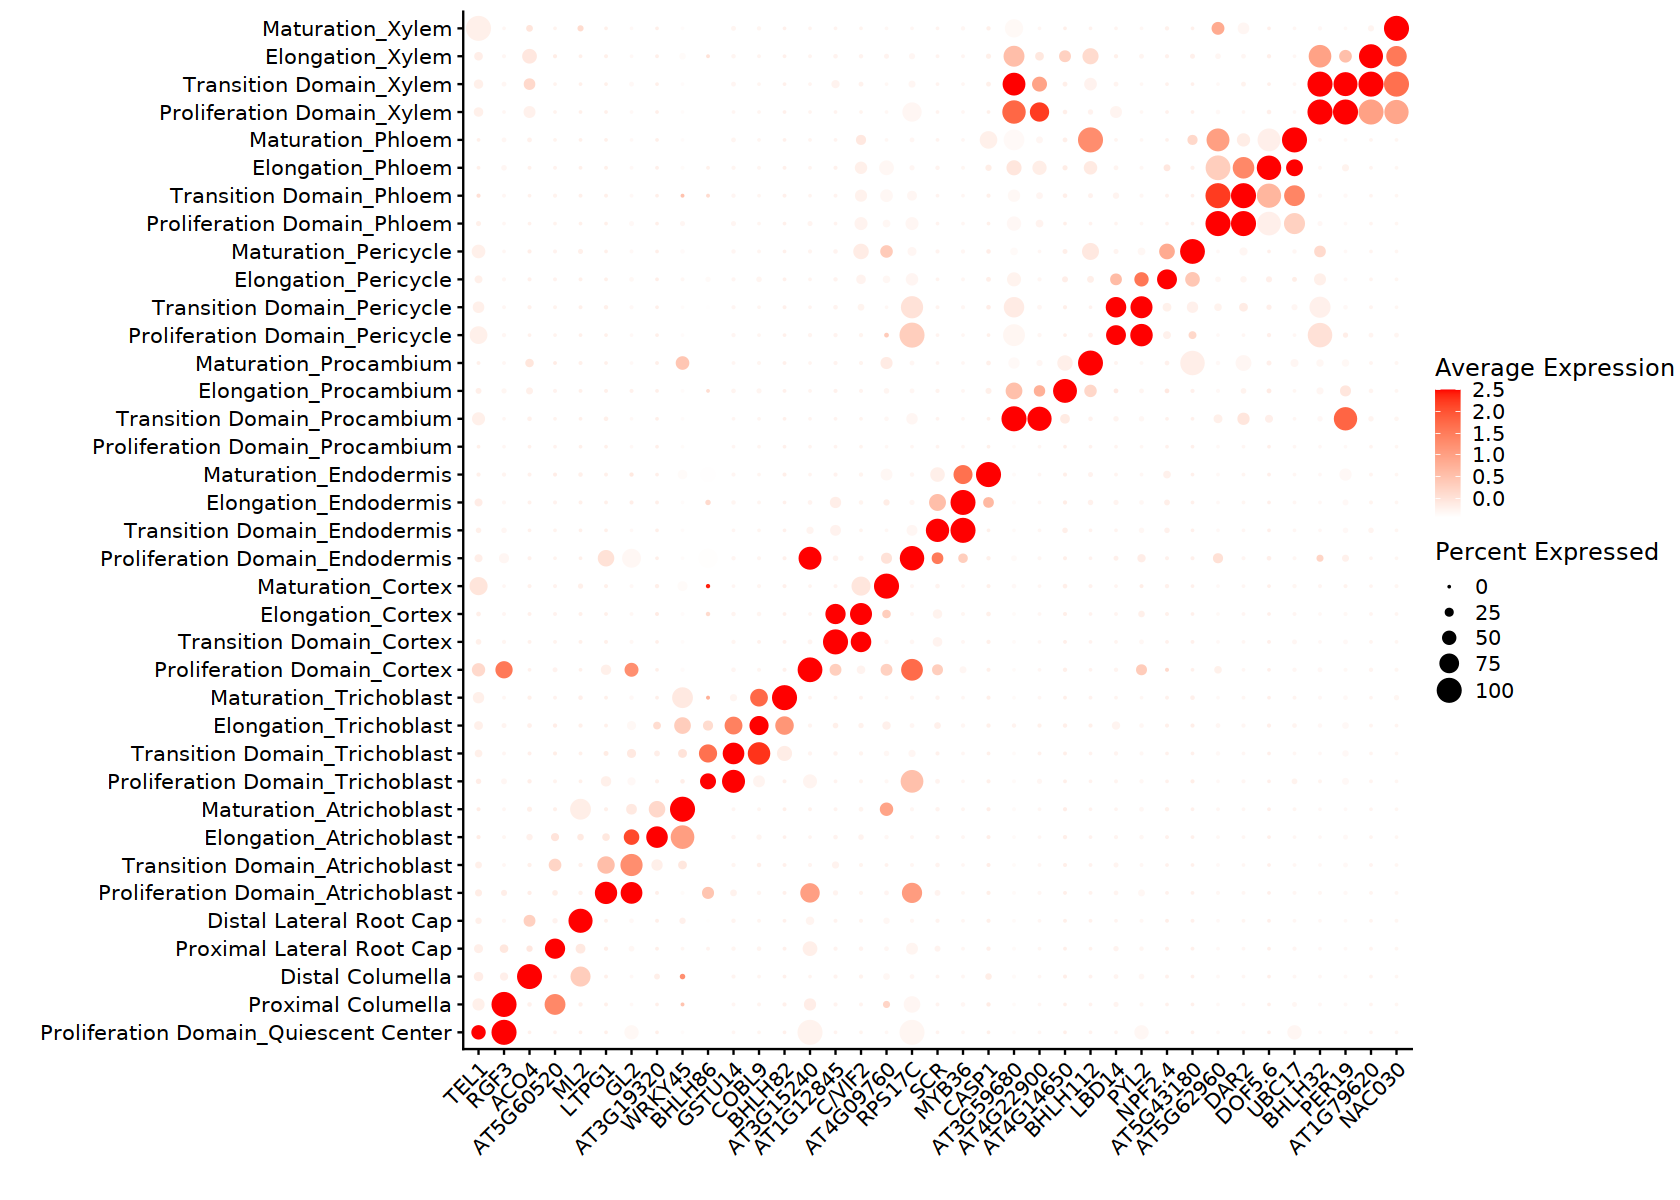

In [229]:
## BL2
bl2$time.celltype.anno.Li.crude <- factor(bl2$time.celltype.anno.Li.crude, levels = order[sort(match(unique(bl2$time.celltype.anno.Li.crude),order))])

options(repr.plot.width=14, repr.plot.height=10)

DotPlot(object = bl2, features = ct_to_plt_genes, cols = c("white", "red")) + RotatedAxis() + 
scale_x_discrete(breaks=ct_to_plt_genes, labels=labels) + xlab("")+scale_y_discrete(breaks=order, labels=order) + ylab("")


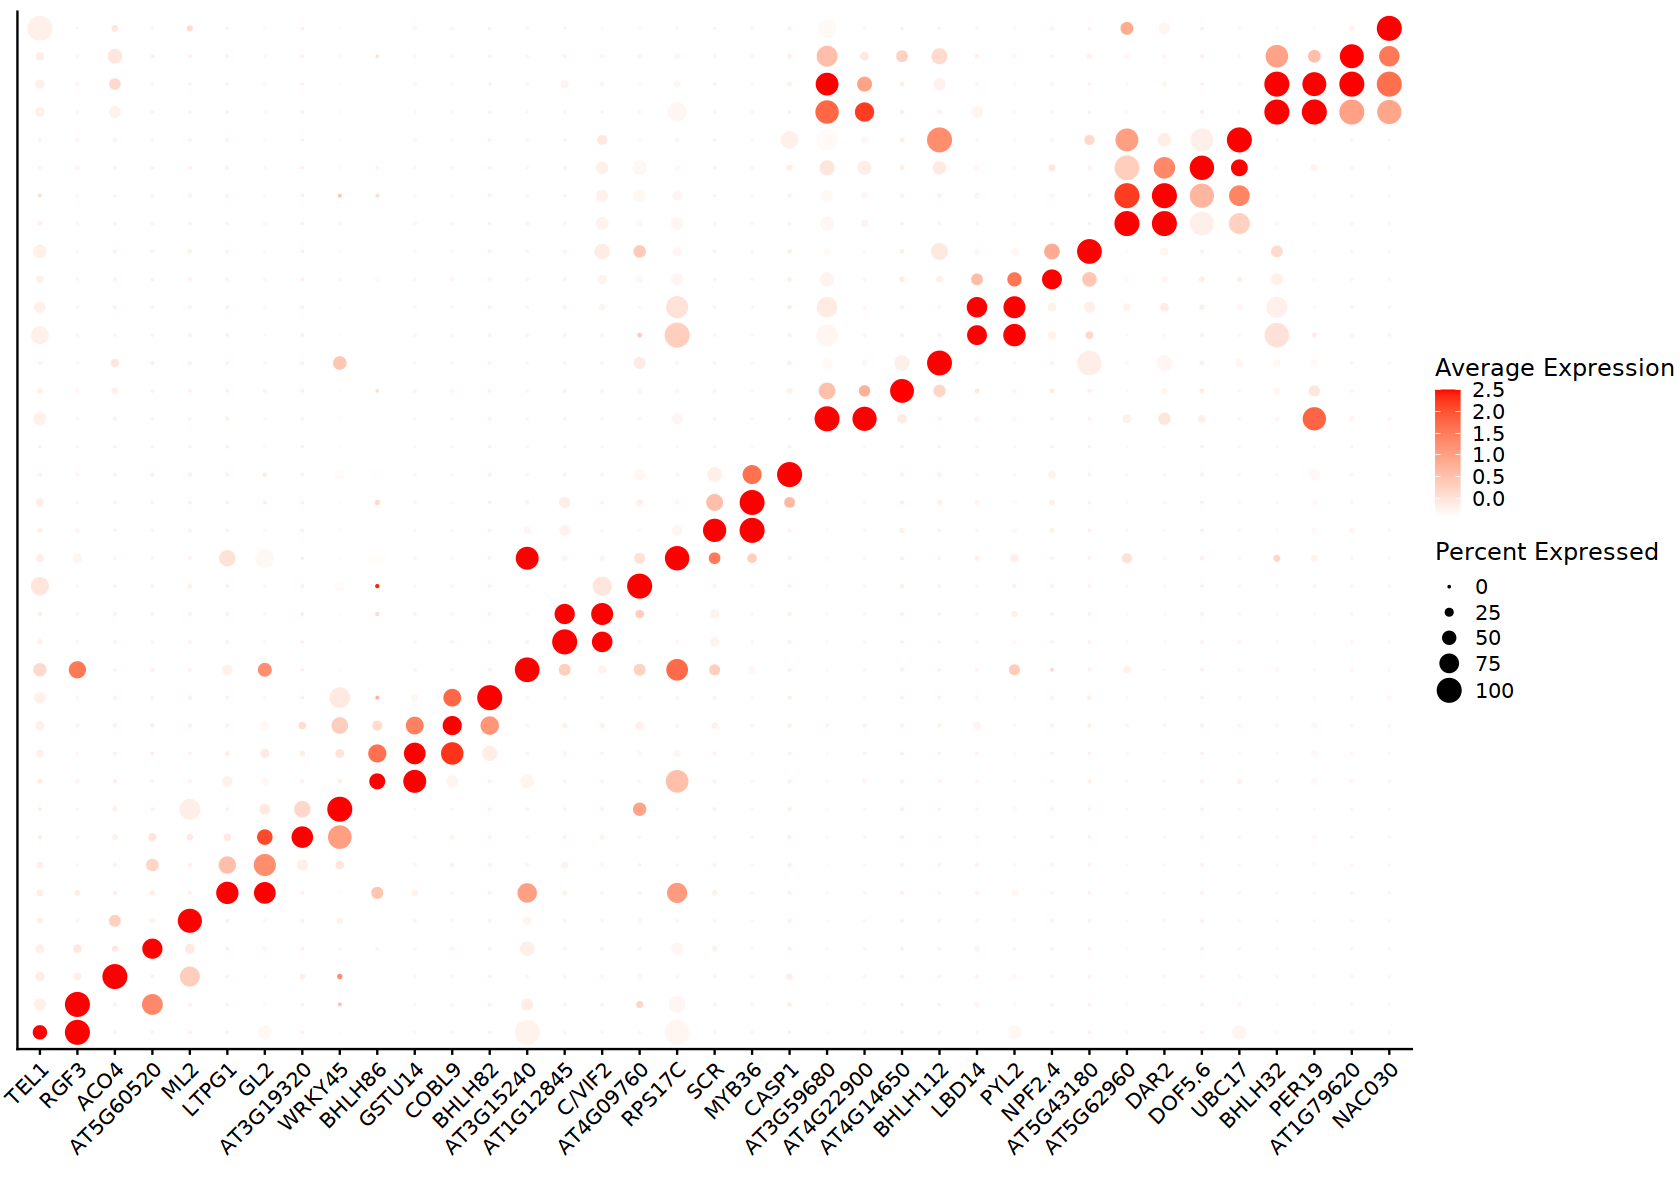

In [230]:
options(repr.plot.width=14, repr.plot.height=10)
dot <- DotPlot(object = bl2, features = ct_to_plt_genes, cols = c("white", "red")) + RotatedAxis() + ylab("")  + theme(axis.title.y=element_blank(),
        axis.text.y=element_blank(),
        axis.ticks.y=element_blank()) + 
scale_x_discrete(breaks=ct_to_plt_genes, labels=labels) + xlab("")
dot 

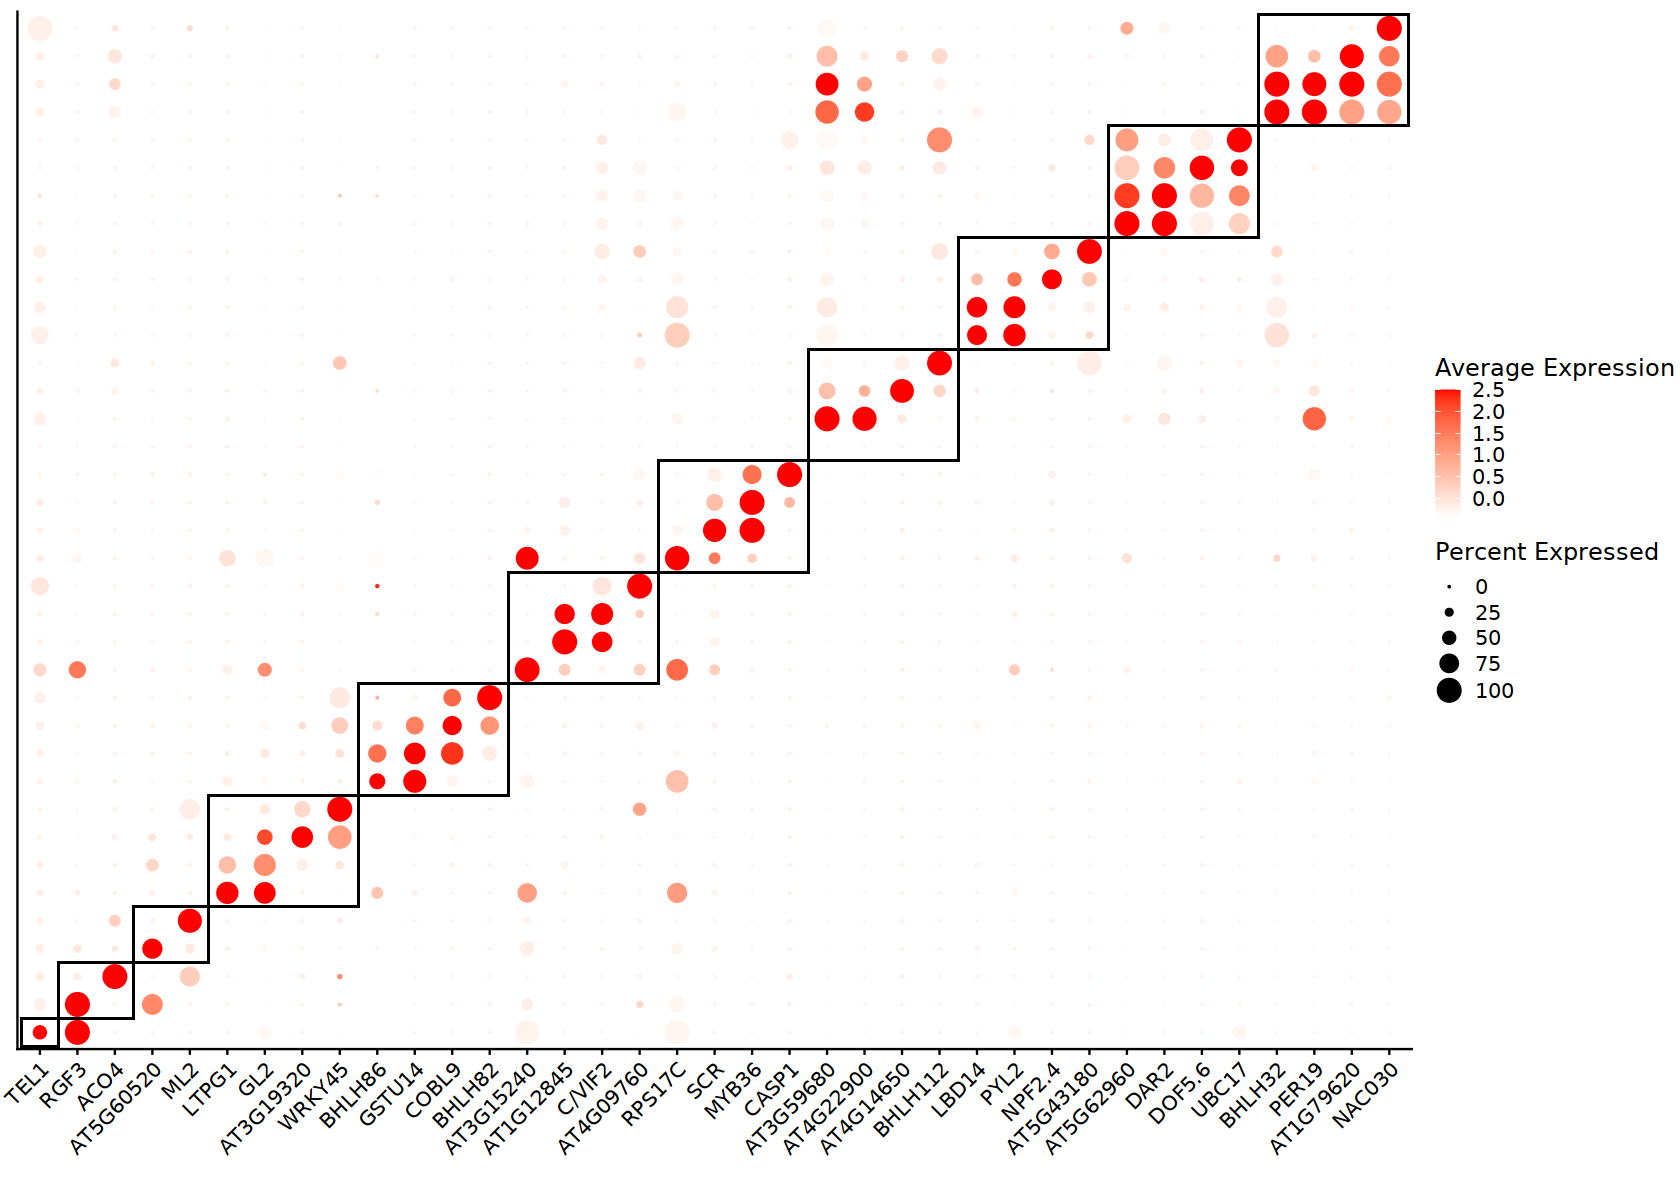

In [231]:
options(repr.plot.width=14, repr.plot.height=10)
dot <- dot + geom_rect(xmin = 0.5, xmax = 1.5, ymin = 0.5, ymax = 1.5, alpha = 0,fill=alpha("grey",0), color="black") + 
geom_rect(xmin = 1.5, xmax = 3.5, ymin = 1.5, ymax = 3.5, alpha = 0,fill=alpha("grey",0), color="black") + 
geom_rect(xmin = 3.5, xmax = 5.5, ymin = 3.5, ymax = 5.5, alpha = 0,fill=alpha("grey",0), color="black") + 
geom_rect(xmin = 5.5, xmax = 9.5, ymin = 5.5, ymax = 9.5, alpha = 0,fill=alpha("grey",0), color="black") + 
geom_rect(xmin = 9.5, xmax = 13.5, ymin = 9.5, ymax = 13.5, alpha = 0,fill=alpha("grey",0), color="black") + 
geom_rect(xmin = 13.5, xmax = 17.5, ymin = 13.5, ymax = 17.5, alpha = 0,fill=alpha("grey",0), color="black") + 
geom_rect(xmin = 17.5, xmax = 21.5, ymin = 17.5, ymax = 21.5, alpha = 0,fill=alpha("grey",0), color="black") + 
geom_rect(xmin = 21.5, xmax = 25.5, ymin = 21.5, ymax = 25.5, alpha = 0,fill=alpha("grey",0), color="black") + 
geom_rect(xmin = 25.5, xmax = 29.5, ymin = 25.5, ymax = 29.5, alpha = 0,fill=alpha("grey",0), color="black") + 
geom_rect(xmin = 29.5, xmax = 33.5, ymin = 29.5, ymax = 33.5, alpha = 0,fill=alpha("grey",0), color="black") + 
geom_rect(xmin = 33.5, xmax = 37.5, ymin = 33.5, ymax = 37.5, alpha = 0,fill=alpha("grey",0), color="black") 
#geom_rect(xmin = 37.5, xmax = 41.5, ymin = 37.5, ymax = 41.5, alpha = 0,fill=alpha("grey",0), color="black") + 
#geom_rect(xmin = 41.5, xmax = 45.5, ymin = 41.5, ymax = 45.5, alpha = 0,fill=alpha("grey",0), color="black") + 
#geom_rect(xmin = 45.5, xmax = 49.5, ymin = 45.5, ymax = 49.5, alpha = 0,fill=alpha("grey",0), color="black")

dot

In [232]:
ggsave("../BL_2hours_cell_dev_marker_dot_20220808.pdf", width=12, height=10)

In [235]:
## BRZ
brz$time.celltype.anno.Li.crude <- factor(brz$time.celltype.anno.Li.crude, levels = order[sort(match(unique(brz$time.celltype.anno.Li.crude),order))])

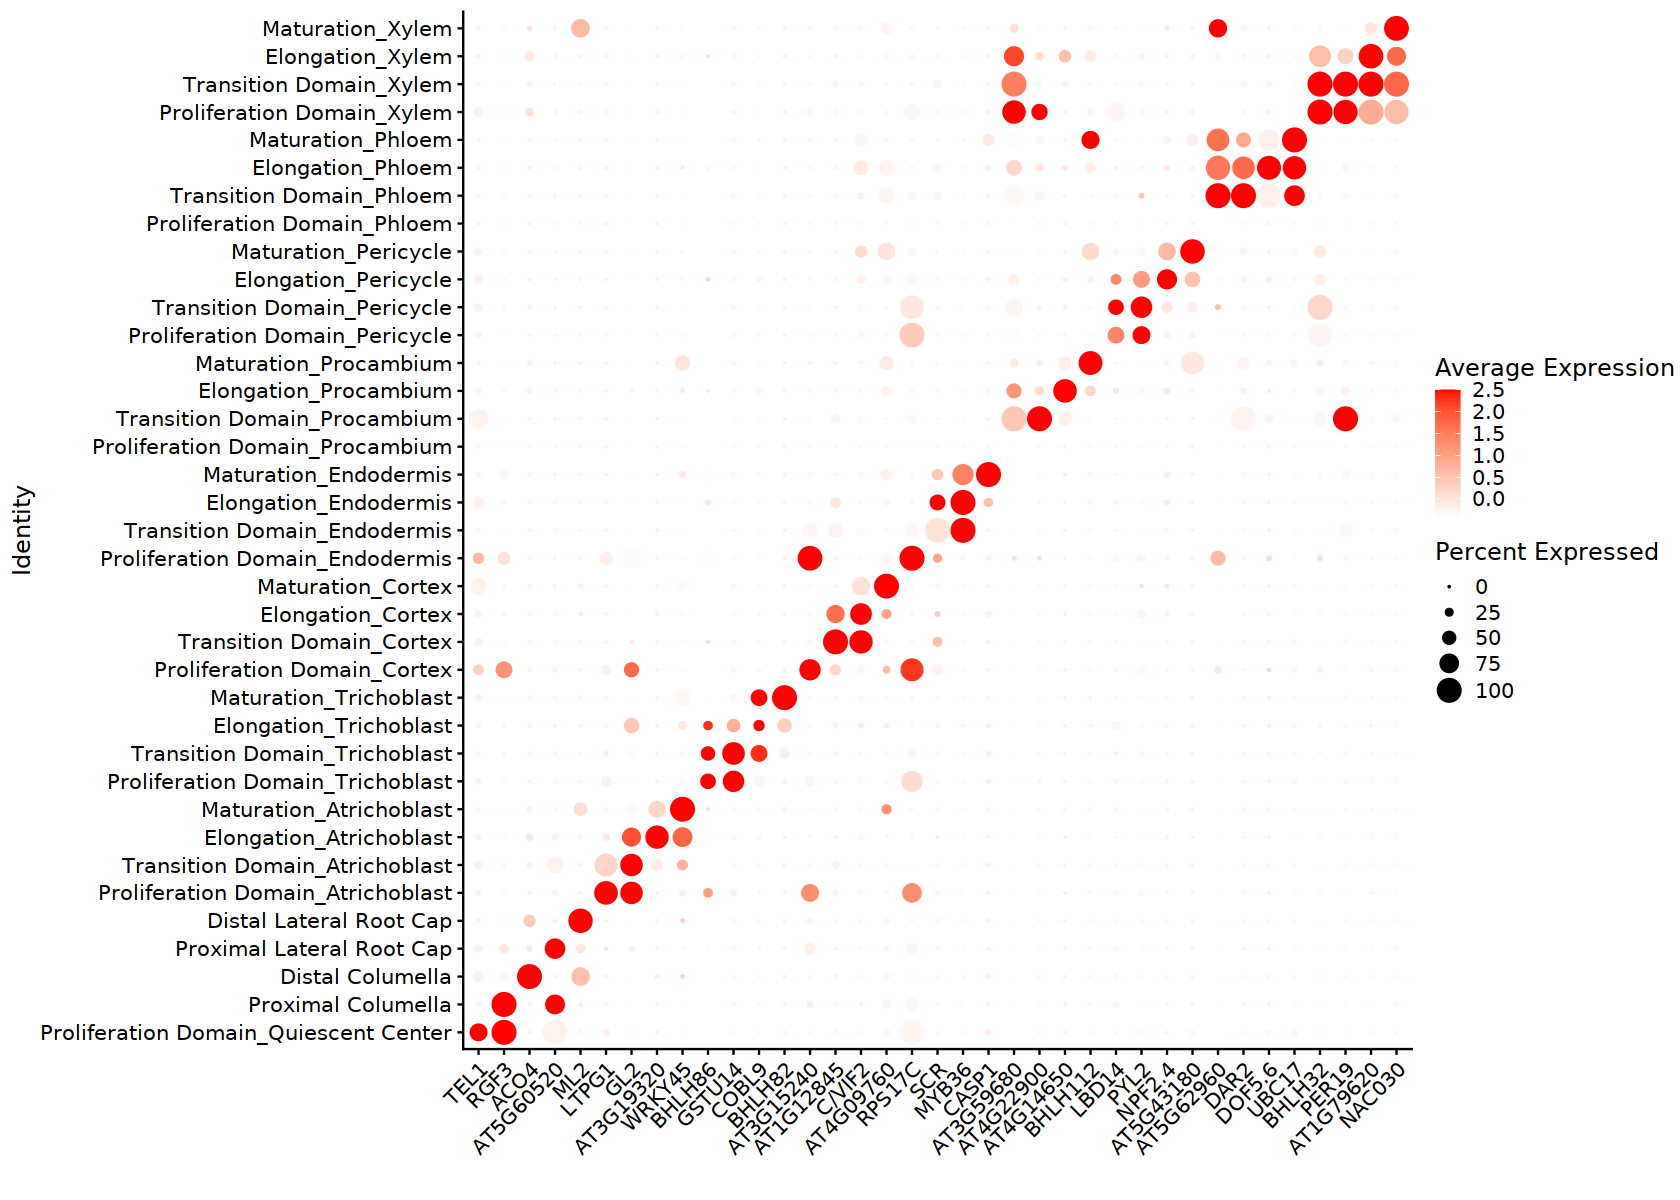

In [236]:
options(repr.plot.width=14, repr.plot.height=10)

DotPlot(object = brz, features = ct_to_plt_genes, cols = c("white", "red")) + RotatedAxis() + 
scale_x_discrete(breaks=ct_to_plt_genes, labels=labels) + xlab("")


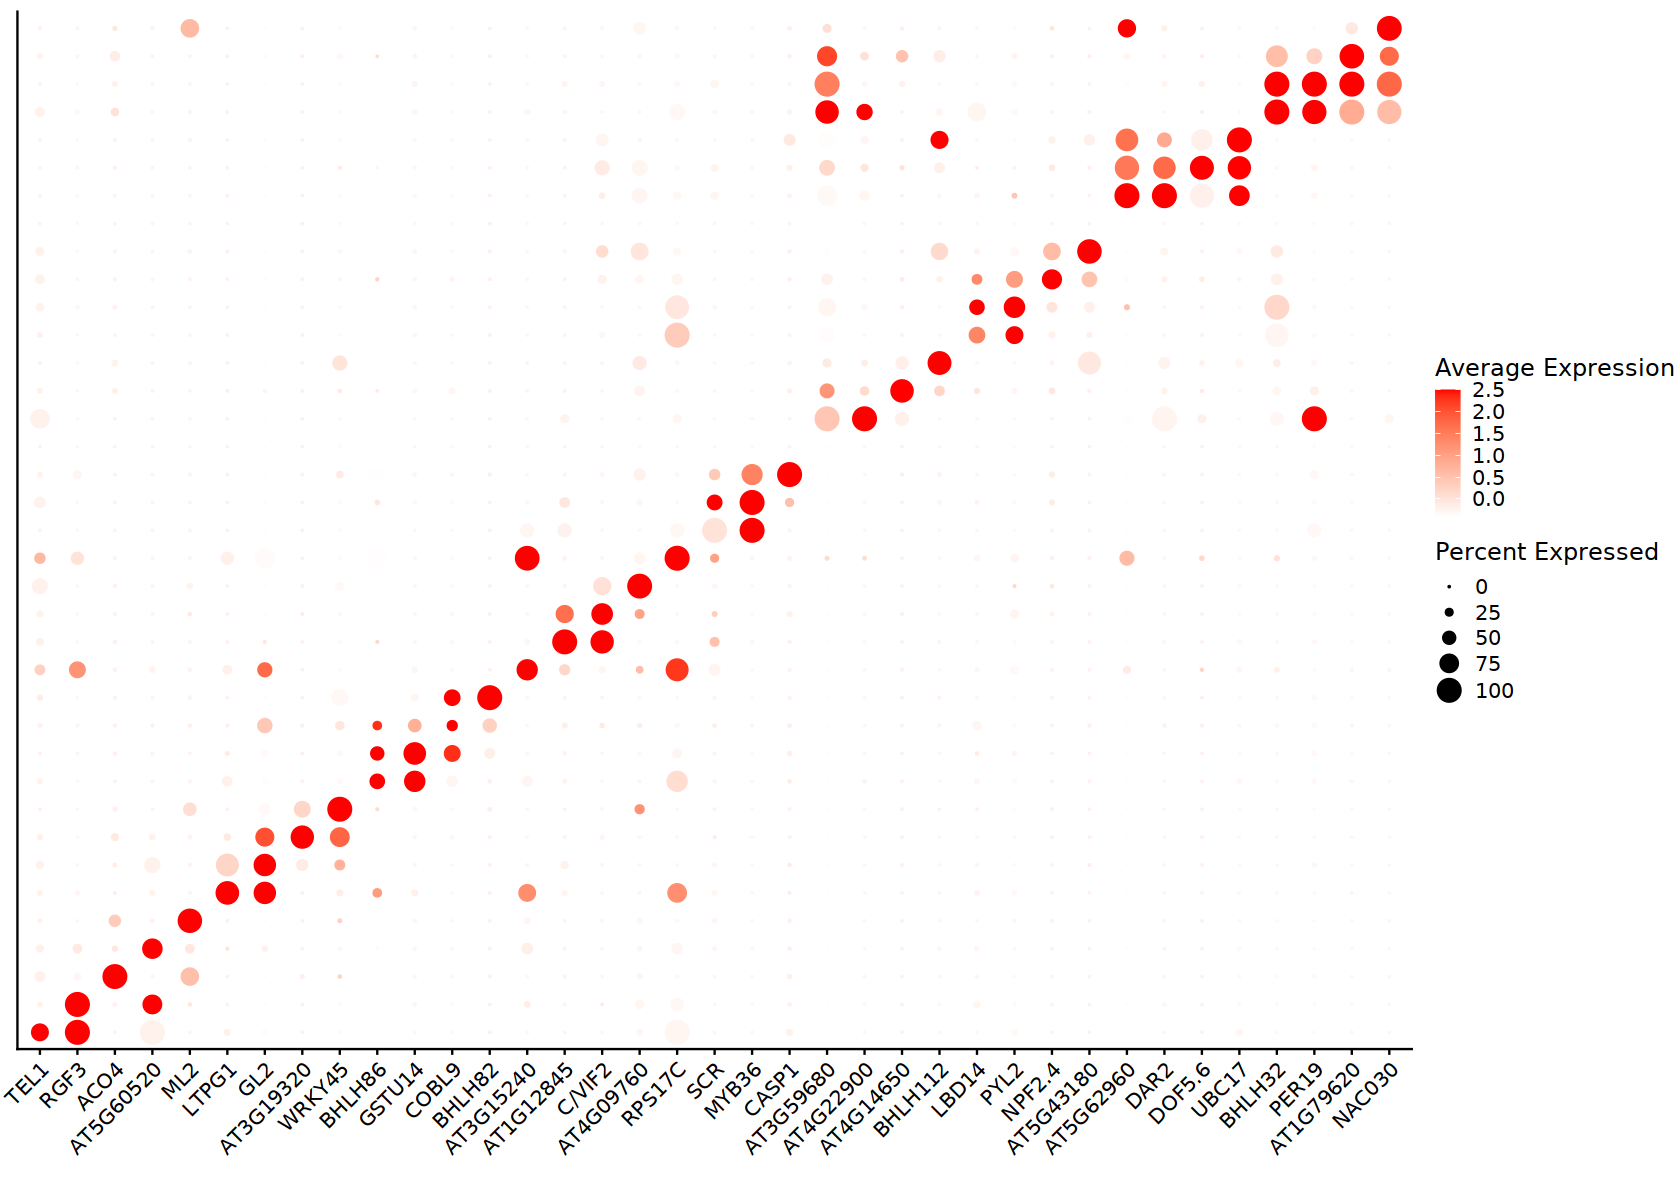

In [237]:
options(repr.plot.width=14, repr.plot.height=10)
dot <- DotPlot(object = brz, features = ct_to_plt_genes, cols = c("white", "red")) + RotatedAxis() + ylab("")  + theme(axis.title.y=element_blank(),
        axis.text.y=element_blank(),
        axis.ticks.y=element_blank()) + 
scale_x_discrete(breaks=ct_to_plt_genes, labels=labels) + xlab("")
dot 

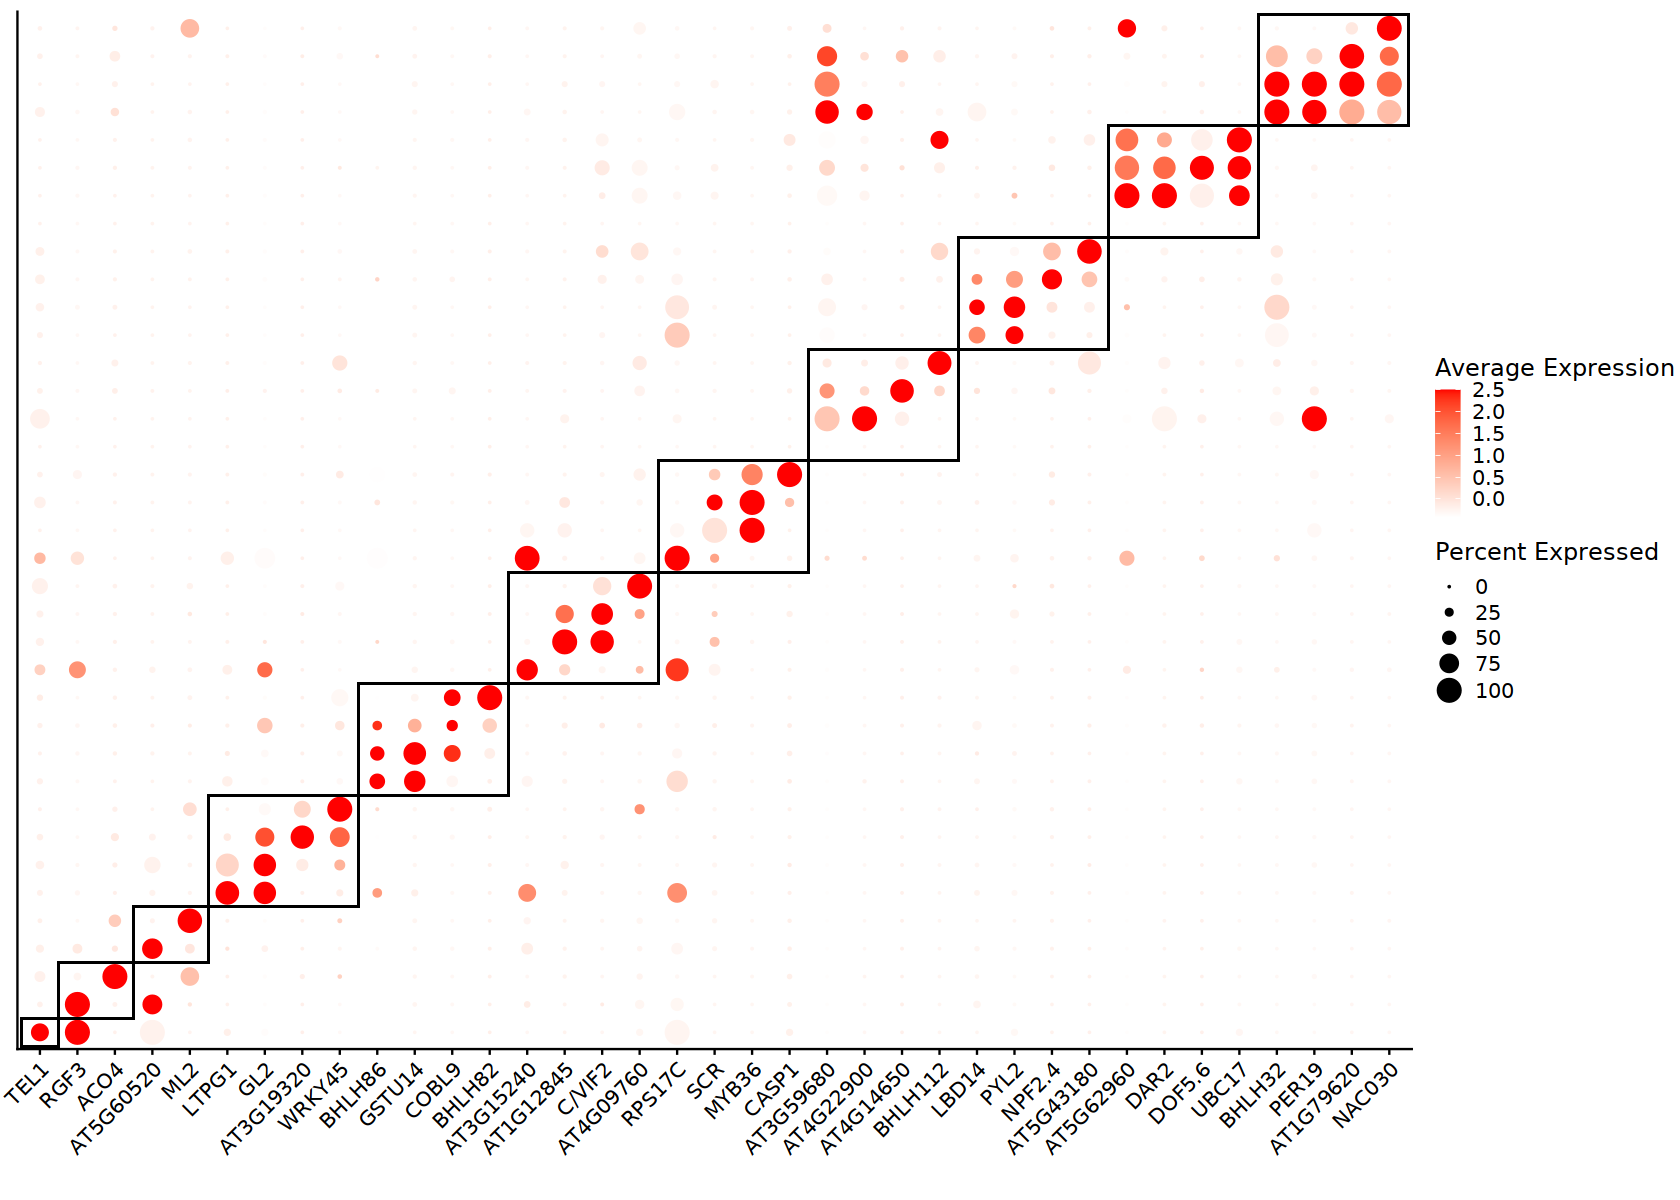

In [238]:
options(repr.plot.width=14, repr.plot.height=10)
dot <- dot + geom_rect(xmin = 0.5, xmax = 1.5, ymin = 0.5, ymax = 1.5, alpha = 0,fill=alpha("grey",0), color="black") + 
geom_rect(xmin = 1.5, xmax = 3.5, ymin = 1.5, ymax = 3.5, alpha = 0,fill=alpha("grey",0), color="black") + 
geom_rect(xmin = 3.5, xmax = 5.5, ymin = 3.5, ymax = 5.5, alpha = 0,fill=alpha("grey",0), color="black") + 
geom_rect(xmin = 5.5, xmax = 9.5, ymin = 5.5, ymax = 9.5, alpha = 0,fill=alpha("grey",0), color="black") + 
geom_rect(xmin = 9.5, xmax = 13.5, ymin = 9.5, ymax = 13.5, alpha = 0,fill=alpha("grey",0), color="black") + 
geom_rect(xmin = 13.5, xmax = 17.5, ymin = 13.5, ymax = 17.5, alpha = 0,fill=alpha("grey",0), color="black") + 
geom_rect(xmin = 17.5, xmax = 21.5, ymin = 17.5, ymax = 21.5, alpha = 0,fill=alpha("grey",0), color="black") + 
geom_rect(xmin = 21.5, xmax = 25.5, ymin = 21.5, ymax = 25.5, alpha = 0,fill=alpha("grey",0), color="black") + 
geom_rect(xmin = 25.5, xmax = 29.5, ymin = 25.5, ymax = 29.5, alpha = 0,fill=alpha("grey",0), color="black") + 
geom_rect(xmin = 29.5, xmax = 33.5, ymin = 29.5, ymax = 33.5, alpha = 0,fill=alpha("grey",0), color="black") + 
geom_rect(xmin = 33.5, xmax = 37.5, ymin = 33.5, ymax = 37.5, alpha = 0,fill=alpha("grey",0), color="black") 
#geom_rect(xmin = 37.5, xmax = 41.5, ymin = 37.5, ymax = 41.5, alpha = 0,fill=alpha("grey",0), color="black") + 
#geom_rect(xmin = 41.5, xmax = 45.5, ymin = 41.5, ymax = 45.5, alpha = 0,fill=alpha("grey",0), color="black") + 
#geom_rect(xmin = 45.5, xmax = 49.5, ymin = 45.5, ymax = 49.5, alpha = 0,fill=alpha("grey",0), color="black")

dot

In [239]:
ggsave("../BRZ_cell_dev_marker_dot_20220808.pdf", width=12, height=10)

In [100]:
## BL time course
Idents(rc.integrated) <- "time.celltype.anno.Li.crude"
DefaultAssay(rc.integrated) <- "integrated"
rc.integrated$time.celltype.anno.Li.crude <- factor(rc.integrated$time.celltype.anno.Li.crude, levels = order[sort(match(unique(rc.integrated$time.celltype.anno.Li.crude),order))])

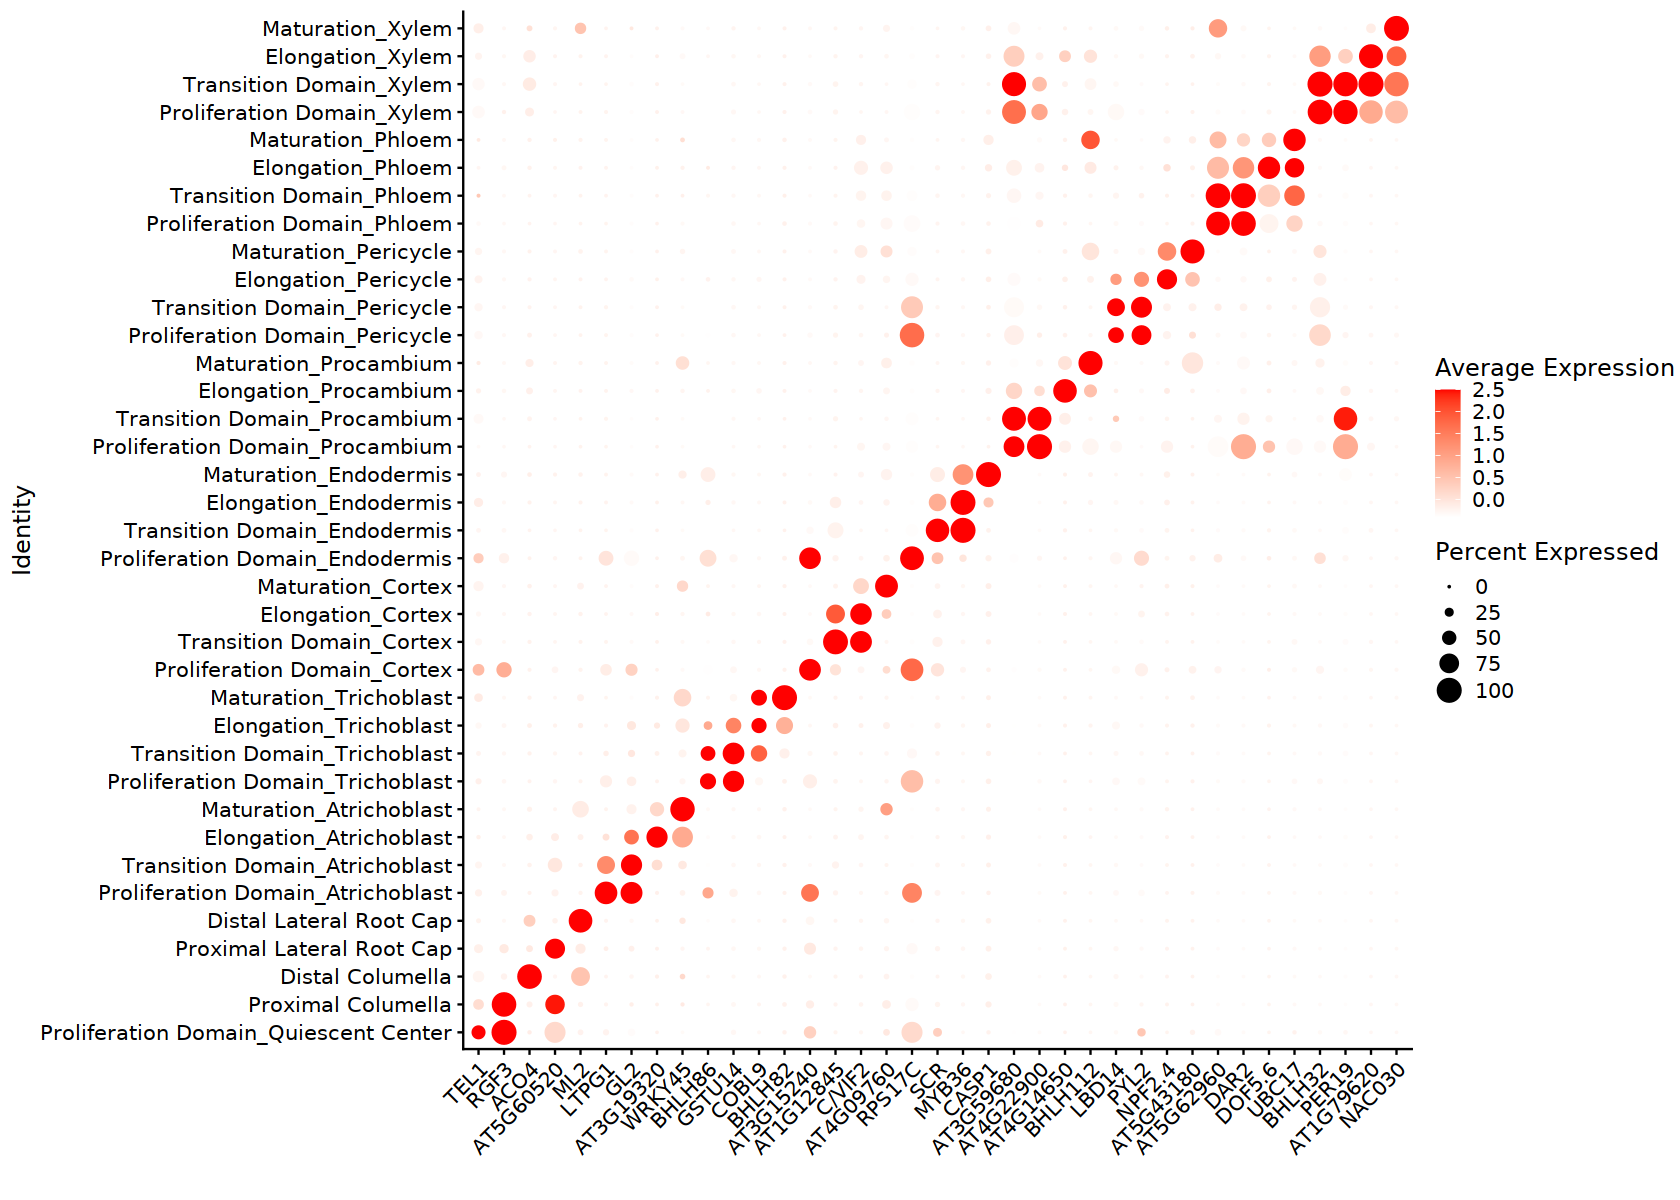

In [101]:
options(repr.plot.width=14, repr.plot.height=10)

DotPlot(object = rc.integrated, features = ct_to_plt_genes, cols = c("white", "red")) + RotatedAxis() + 
scale_x_discrete(breaks=ct_to_plt_genes, labels=labels) + xlab("")


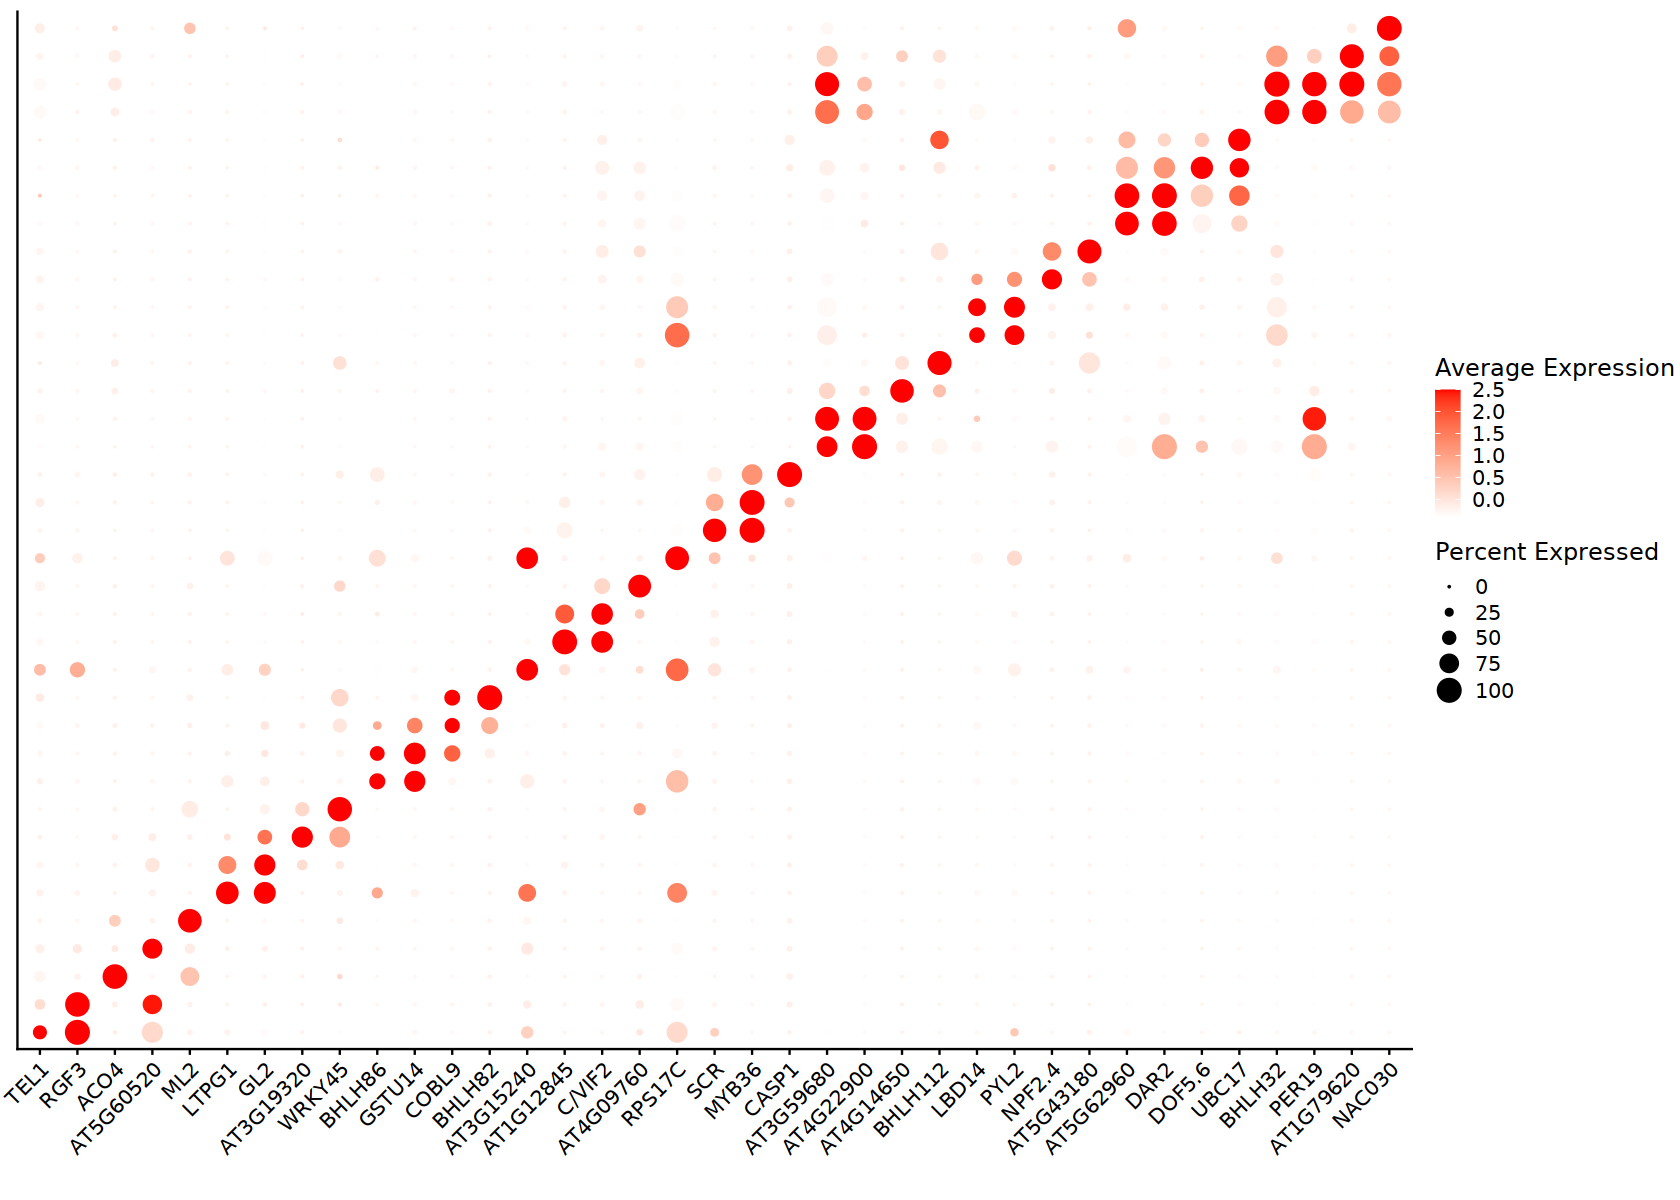

In [103]:
options(repr.plot.width=14, repr.plot.height=10)
dot <- DotPlot(object = rc.integrated, features = ct_to_plt_genes, cols = c("white", "red")) + RotatedAxis() + ylab("")  + theme(axis.title.y=element_blank(),
        axis.text.y=element_blank(),
        axis.ticks.y=element_blank()) + 
scale_x_discrete(breaks=ct_to_plt_genes, labels=labels) + xlab("")
dot 

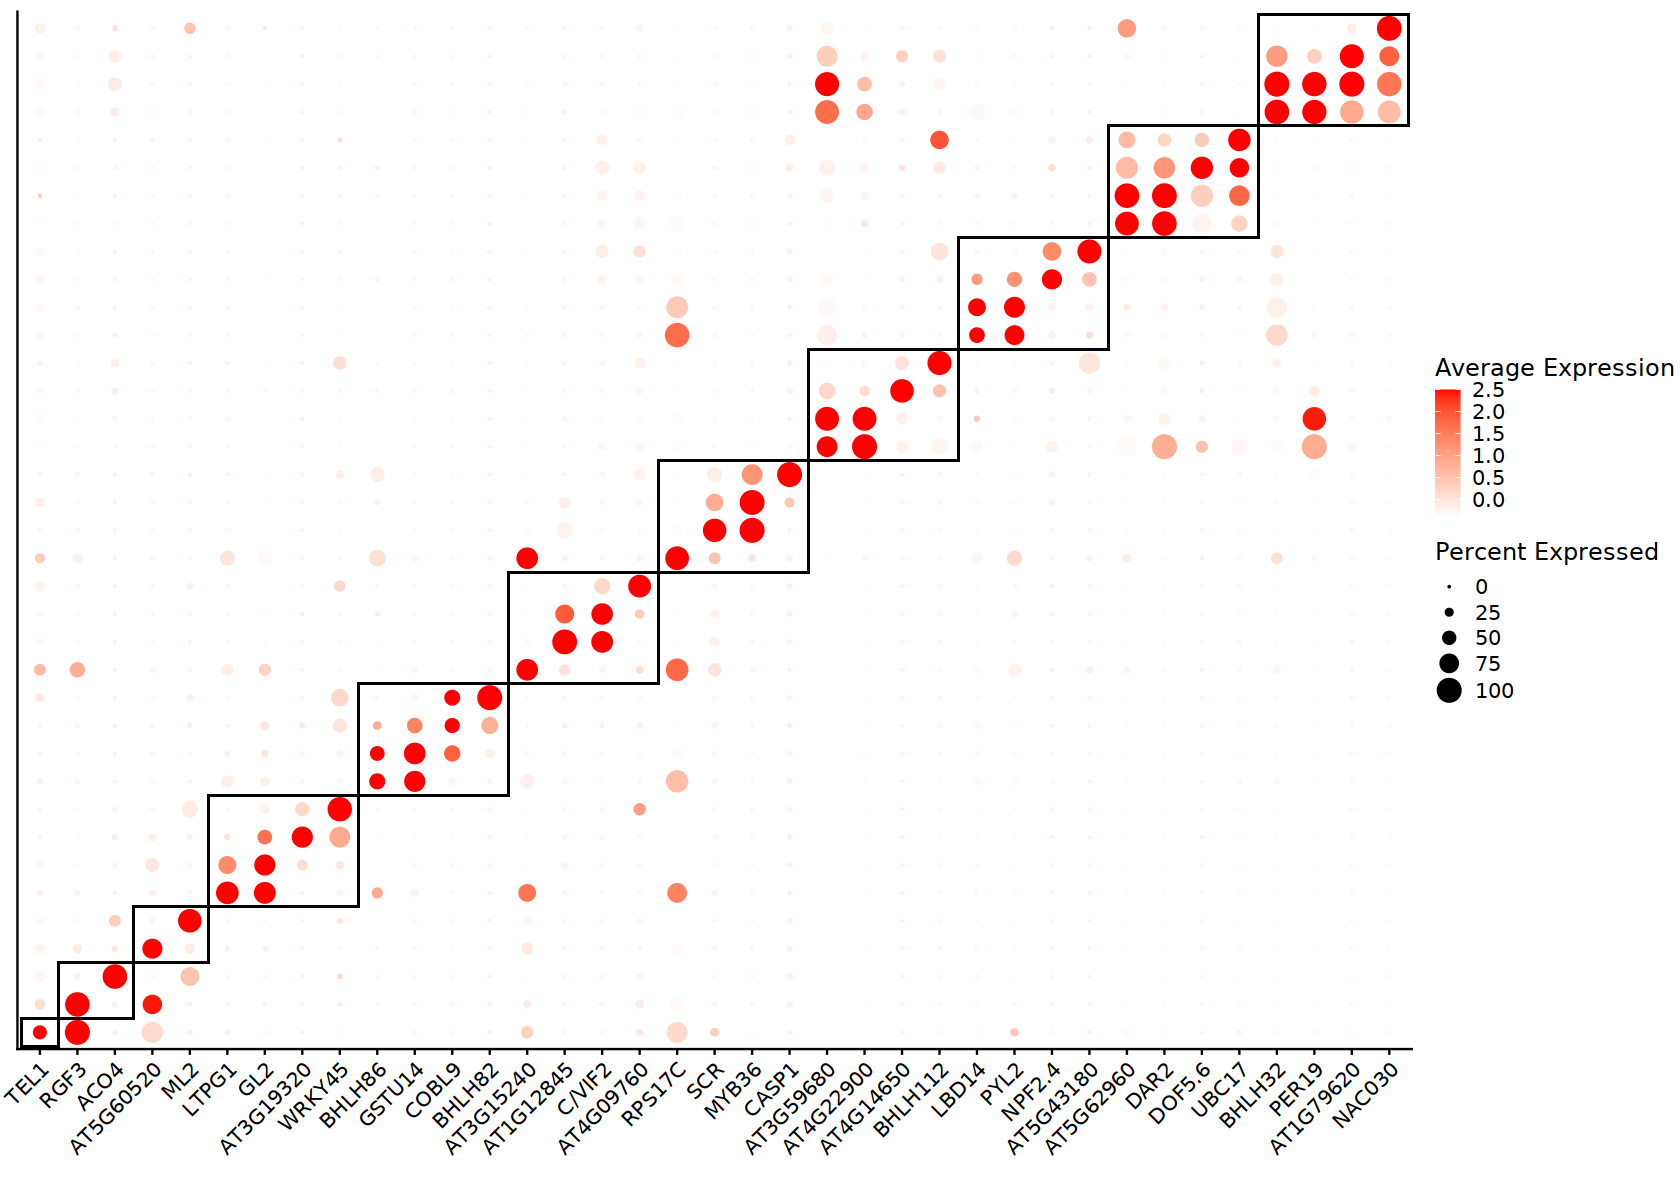

In [104]:
options(repr.plot.width=14, repr.plot.height=10)
dot <- dot + geom_rect(xmin = 0.5, xmax = 1.5, ymin = 0.5, ymax = 1.5, alpha = 0,fill=alpha("grey",0), color="black") + 
geom_rect(xmin = 1.5, xmax = 3.5, ymin = 1.5, ymax = 3.5, alpha = 0,fill=alpha("grey",0), color="black") + 
geom_rect(xmin = 3.5, xmax = 5.5, ymin = 3.5, ymax = 5.5, alpha = 0,fill=alpha("grey",0), color="black") + 
geom_rect(xmin = 5.5, xmax = 9.5, ymin = 5.5, ymax = 9.5, alpha = 0,fill=alpha("grey",0), color="black") + 
geom_rect(xmin = 9.5, xmax = 13.5, ymin = 9.5, ymax = 13.5, alpha = 0,fill=alpha("grey",0), color="black") + 
geom_rect(xmin = 13.5, xmax = 17.5, ymin = 13.5, ymax = 17.5, alpha = 0,fill=alpha("grey",0), color="black") + 
geom_rect(xmin = 17.5, xmax = 21.5, ymin = 17.5, ymax = 21.5, alpha = 0,fill=alpha("grey",0), color="black") + 
geom_rect(xmin = 21.5, xmax = 25.5, ymin = 21.5, ymax = 25.5, alpha = 0,fill=alpha("grey",0), color="black") + 
geom_rect(xmin = 25.5, xmax = 29.5, ymin = 25.5, ymax = 29.5, alpha = 0,fill=alpha("grey",0), color="black") + 
geom_rect(xmin = 29.5, xmax = 33.5, ymin = 29.5, ymax = 33.5, alpha = 0,fill=alpha("grey",0), color="black") + 
geom_rect(xmin = 33.5, xmax = 37.5, ymin = 33.5, ymax = 37.5, alpha = 0,fill=alpha("grey",0), color="black") 
#geom_rect(xmin = 37.5, xmax = 41.5, ymin = 37.5, ymax = 41.5, alpha = 0,fill=alpha("grey",0), color="black") + 
#geom_rect(xmin = 41.5, xmax = 45.5, ymin = 41.5, ymax = 45.5, alpha = 0,fill=alpha("grey",0), color="black") + 
#geom_rect(xmin = 45.5, xmax = 49.5, ymin = 45.5, ymax = 49.5, alpha = 0,fill=alpha("grey",0), color="black")

dot

In [171]:
## WT atlas
Idents(rc.integrated) <- "time.celltype.anno.Li.crude"
DefaultAssay(rc.integrated) <- "integrated"

In [170]:
rc.integrated$time.celltype.anno.Li.crude <- factor(rc.integrated$time.celltype.anno.Li.crude, levels = order[sort(match(unique(rc.integrated$time.celltype.anno.Li.crude),order))])

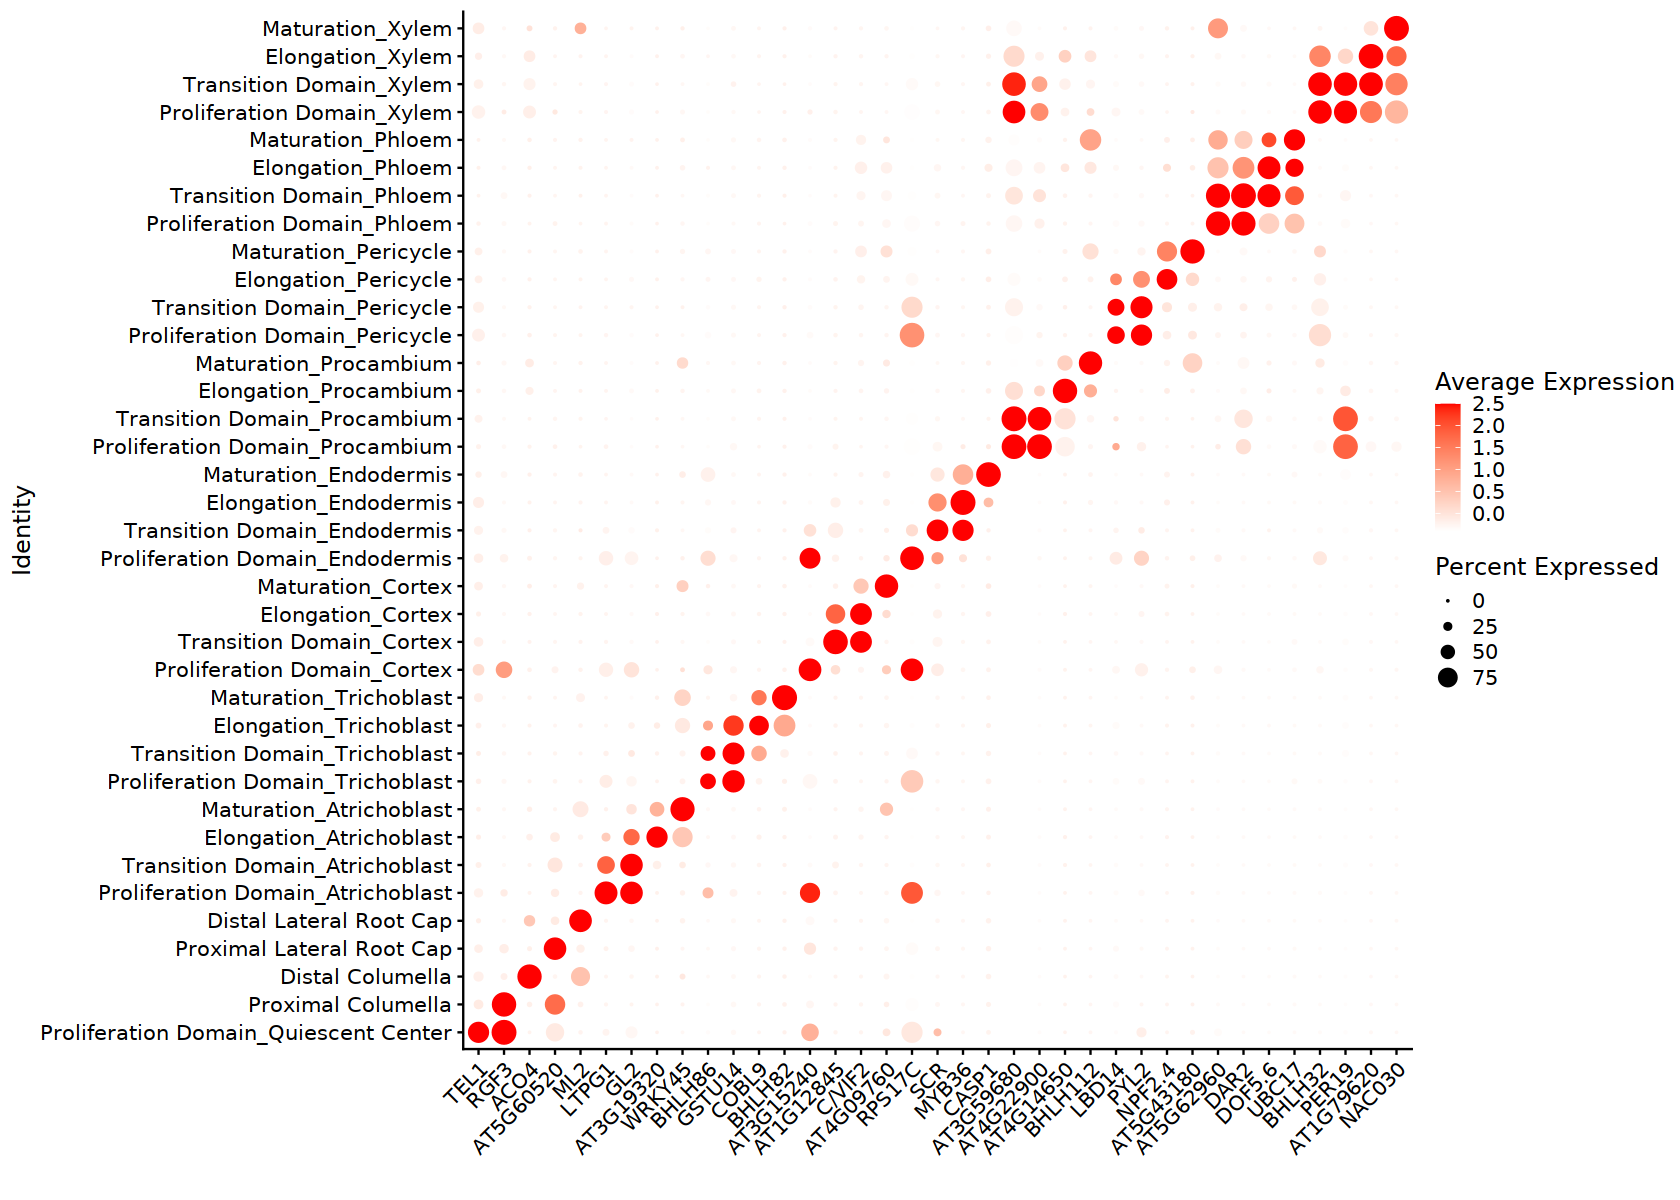

In [172]:
options(repr.plot.width=14, repr.plot.height=10)

DotPlot(object = rc.integrated, features = ct_to_plt_genes, cols = c("white", "red")) + RotatedAxis() + 
scale_x_discrete(breaks=breaks, labels=labels) + xlab("")


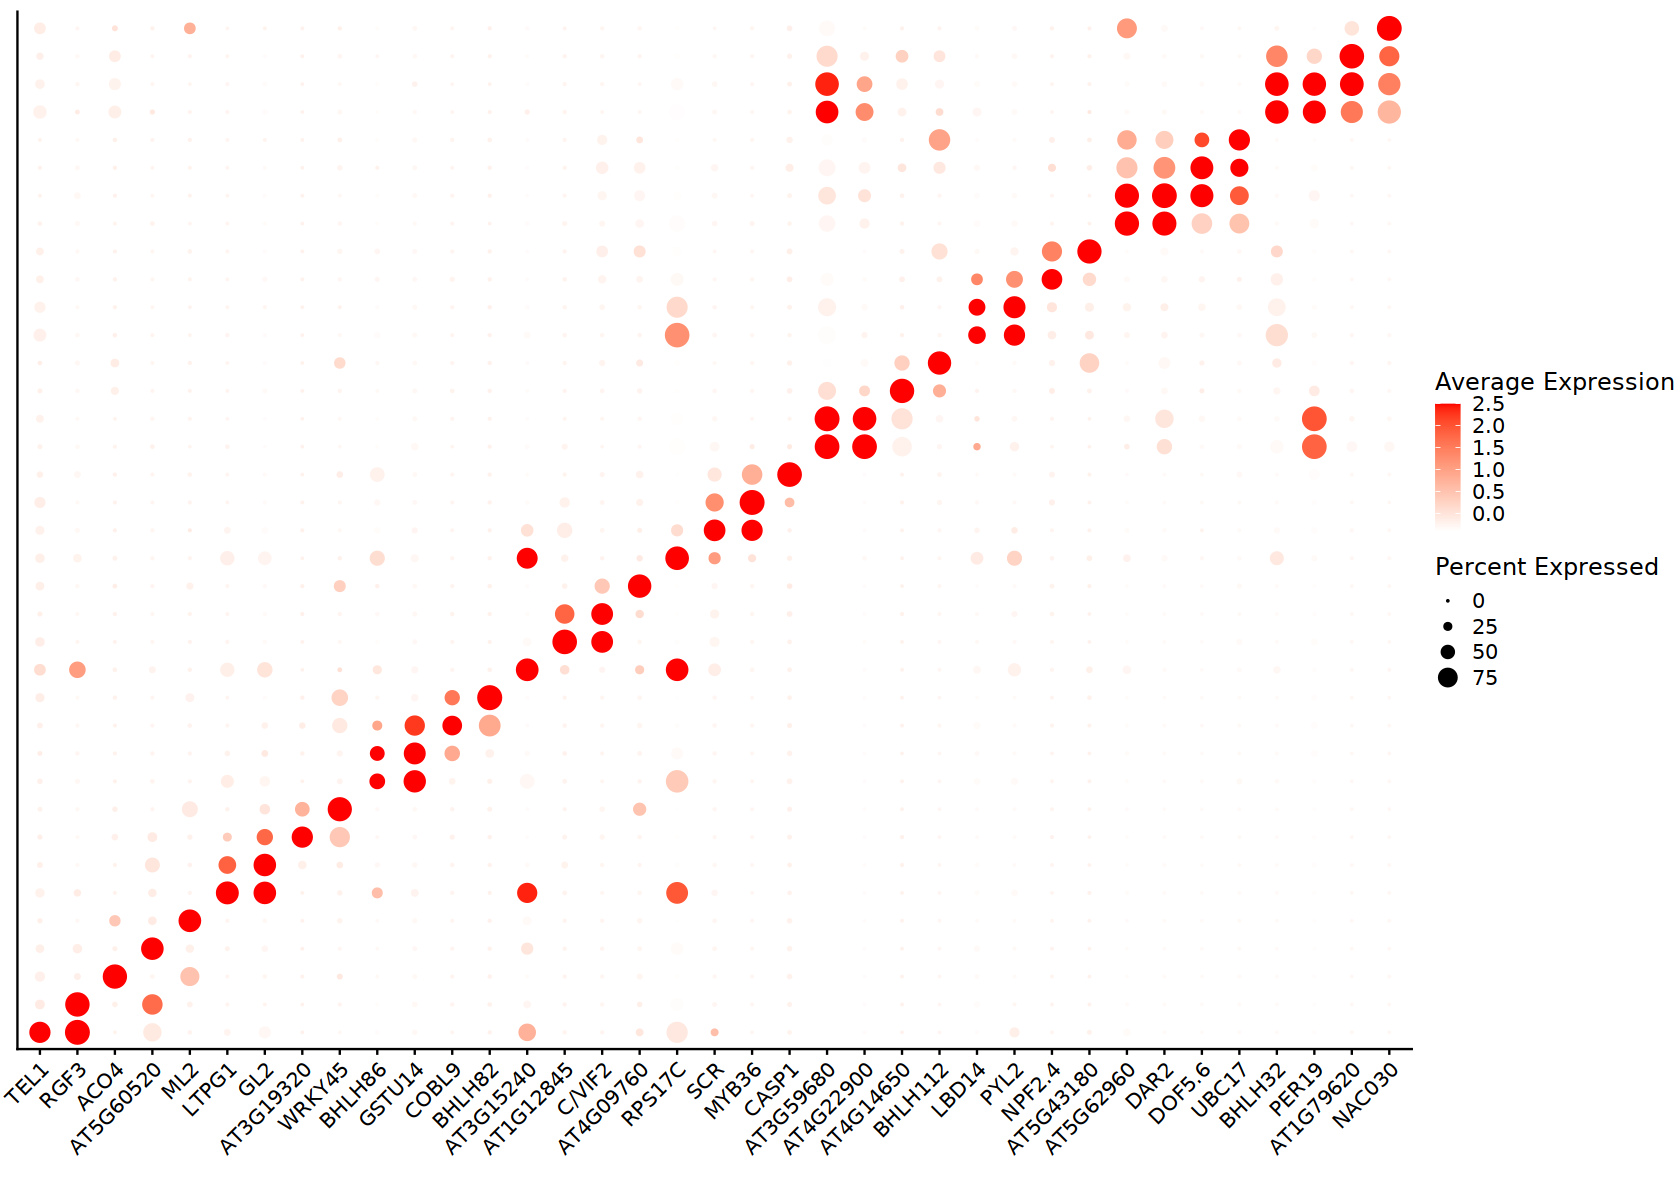

In [173]:
options(repr.plot.width=14, repr.plot.height=10)
dot <- DotPlot(object = rc.integrated, features = ct_to_plt_genes, cols = c("white", "red")) + RotatedAxis() + ylab("")  + theme(axis.title.y=element_blank(),
        axis.text.y=element_blank(),
        axis.ticks.y=element_blank()) + 
scale_x_discrete(breaks=breaks, labels=labels) + xlab("")
dot 

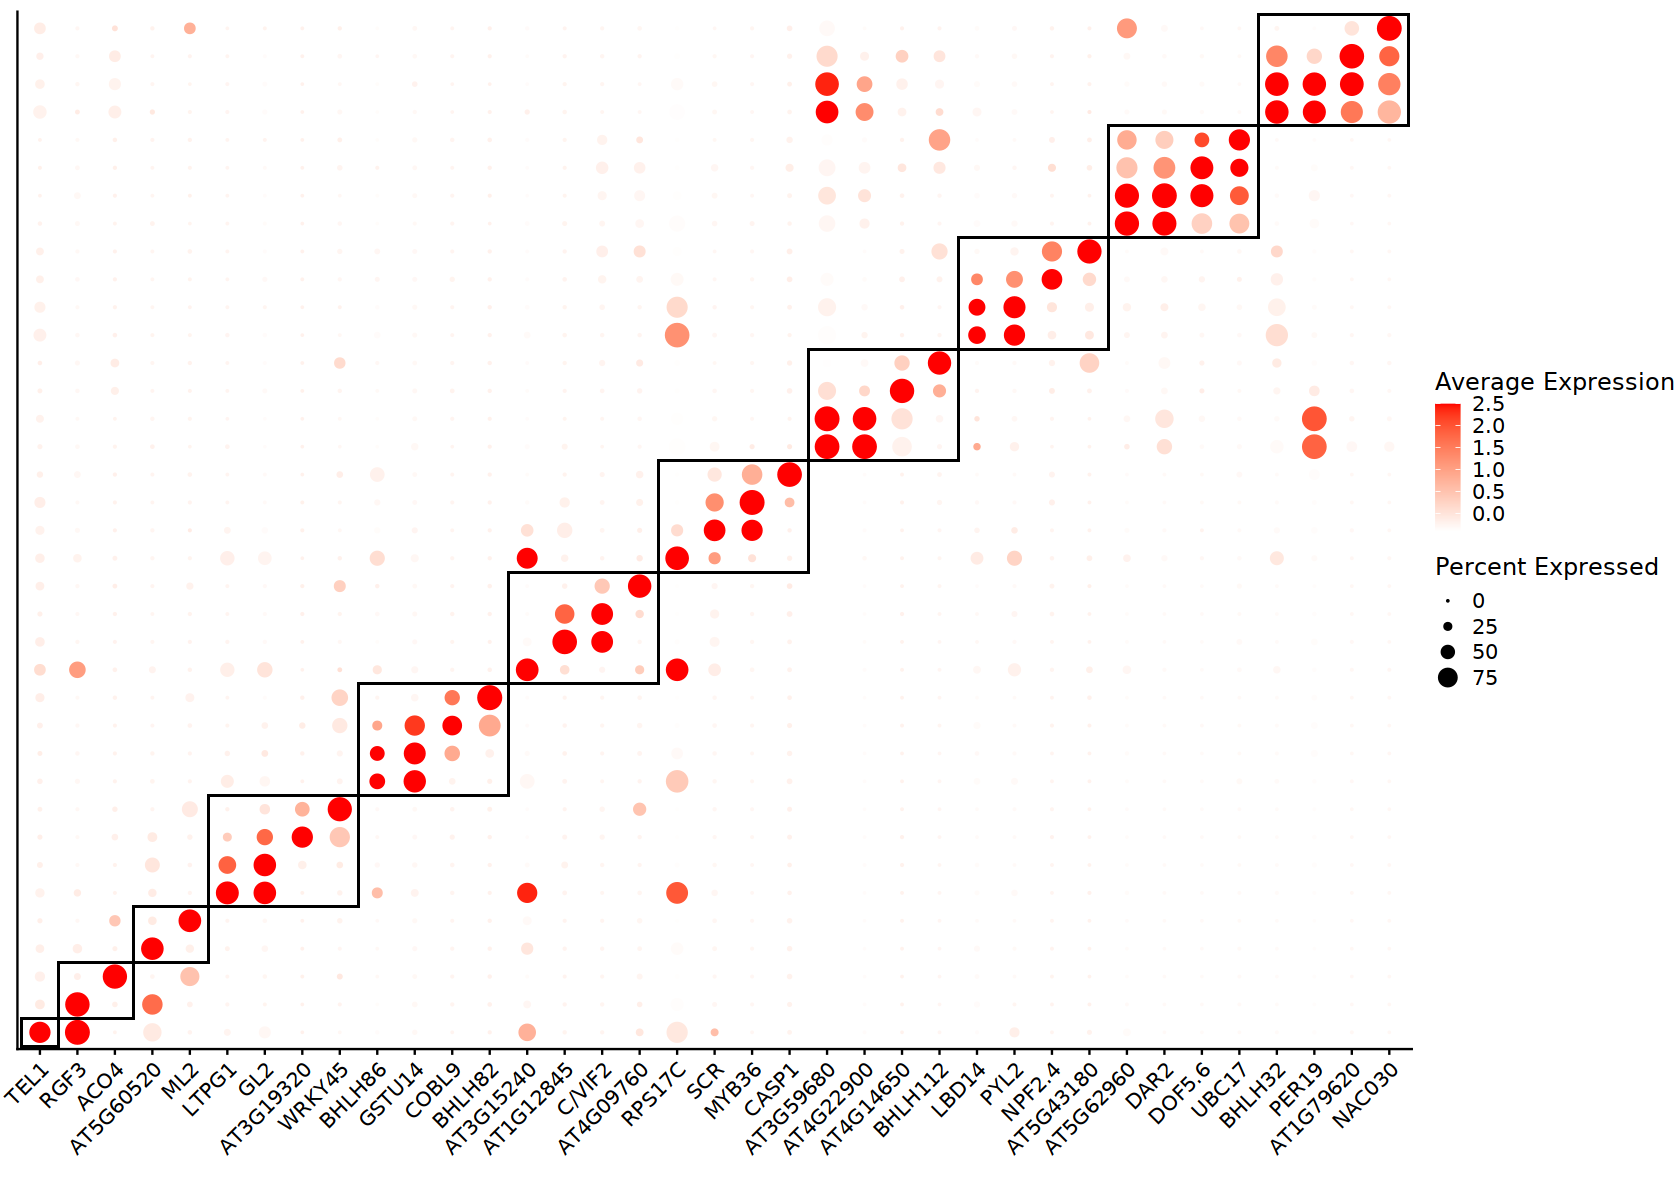

In [174]:
options(repr.plot.width=14, repr.plot.height=10)
dot <- dot + geom_rect(xmin = 0.5, xmax = 1.5, ymin = 0.5, ymax = 1.5, alpha = 0,fill=alpha("grey",0), color="black") + 
geom_rect(xmin = 1.5, xmax = 3.5, ymin = 1.5, ymax = 3.5, alpha = 0,fill=alpha("grey",0), color="black") + 
geom_rect(xmin = 3.5, xmax = 5.5, ymin = 3.5, ymax = 5.5, alpha = 0,fill=alpha("grey",0), color="black") + 
geom_rect(xmin = 5.5, xmax = 9.5, ymin = 5.5, ymax = 9.5, alpha = 0,fill=alpha("grey",0), color="black") + 
geom_rect(xmin = 9.5, xmax = 13.5, ymin = 9.5, ymax = 13.5, alpha = 0,fill=alpha("grey",0), color="black") + 
geom_rect(xmin = 13.5, xmax = 17.5, ymin = 13.5, ymax = 17.5, alpha = 0,fill=alpha("grey",0), color="black") + 
geom_rect(xmin = 17.5, xmax = 21.5, ymin = 17.5, ymax = 21.5, alpha = 0,fill=alpha("grey",0), color="black") + 
geom_rect(xmin = 21.5, xmax = 25.5, ymin = 21.5, ymax = 25.5, alpha = 0,fill=alpha("grey",0), color="black") + 
geom_rect(xmin = 25.5, xmax = 29.5, ymin = 25.5, ymax = 29.5, alpha = 0,fill=alpha("grey",0), color="black") + 
geom_rect(xmin = 29.5, xmax = 33.5, ymin = 29.5, ymax = 33.5, alpha = 0,fill=alpha("grey",0), color="black") + 
geom_rect(xmin = 33.5, xmax = 37.5, ymin = 33.5, ymax = 37.5, alpha = 0,fill=alpha("grey",0), color="black") 
#geom_rect(xmin = 37.5, xmax = 41.5, ymin = 37.5, ymax = 41.5, alpha = 0,fill=alpha("grey",0), color="black") + 
#geom_rect(xmin = 41.5, xmax = 45.5, ymin = 41.5, ymax = 45.5, alpha = 0,fill=alpha("grey",0), color="black") + 
#geom_rect(xmin = 45.5, xmax = 49.5, ymin = 45.5, ymax = 49.5, alpha = 0,fill=alpha("grey",0), color="black")

dot

In [105]:
ann_df <- tibble(timezone=as.character(Markers_to_plot$timezone), 
                celltype= as.character(Markers_to_plot$celltype)) %>% 
mutate(row=dplyr::row_number(), 
col=rep("A")) %>%
group_by(celltype) %>%
mutate(ct_row=dplyr::row_number()) %>%
ungroup() %>%
mutate(Label=celltype)

#ann_df$Label[ann_df$celltype=="Metaphloem & Companion Cell"] <- "Metaphloem & CC"
ann_df$Label[ann_df$ct_row!=3] <- " "
ann_df$Label[ann_df$celltype=="Quiescent Center"] <- "Quiescent Center"
ann_df$Label[(ann_df$celltype=="Columella") & (ann_df$ct_row==2)] <- "Columella"
ann_df$Label[(ann_df$celltype=="Lateral Root Cap") & (ann_df$ct_row==2)] <- "Lateral Root Cap"


ann_df$row <- factor(ann_df$row)
ann_df$timezone <- factor(ann_df$timezone, levels=c("Proliferation Domain", "Transition Domain", "Elongation", "Maturation", "Proximal Lateral Root Cap", "Distal Lateral Root Cap", "Proximal Columella", "Distal Columella"))

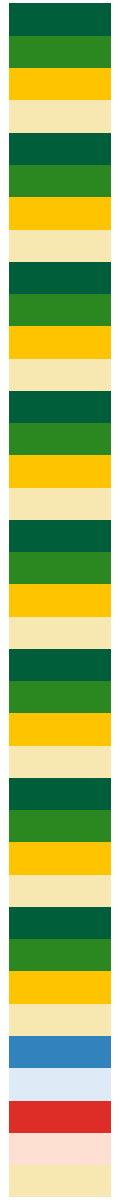

In [107]:
options(repr.plot.width=1, repr.plot.height=10)
(time_ann_p <- ann_df %>% ggplot(aes(x=col, y=row, fill=timezone)) + geom_tile() + scale_fill_manual(values = c('#F7E7B0','#FFC400','#2B871F','#005E3B',"#deebf7", "#3182bd", '#fee0d2','#de2d26')) +theme_nothing())

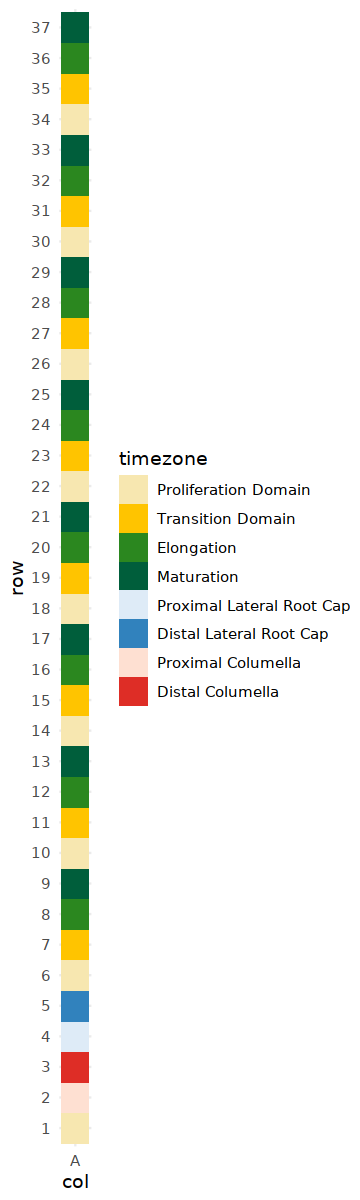

In [108]:
options(repr.plot.width=3, repr.plot.height=10)
ann_df %>% ggplot(aes(x=col, y=row, fill=timezone)) + geom_tile() + scale_fill_manual(values = c('#F7E7B0','#FFC400','#2B871F','#005E3B',"#deebf7", "#3182bd", '#fee0d2','#de2d26')) + theme_minimal()

In [109]:
order <- c("Quiescent Center", "Ground Tissue","Columella", "Lateral Root Cap", "Atrichoblast", "Trichoblast", "Cortex", "Endodermis", "Phloem","Protophloem", "Xylem", "Procambium","Pericycle","Phloem Pole Pericycle", "Protoxylem", "Metaxylem", "Unknown")
palette <- c("#9400d3", "#DCD0FF","#5ab953", "#bfef45", "#008080", "#21B6A8", "#82b6ff", "#0000FF","#e6194b", "#dd77ec", "#9a6324", "#ffe119", "#ff9900", "#ffd4e3", "#9a6324", "#ddaa6f", "#EEEEEE")

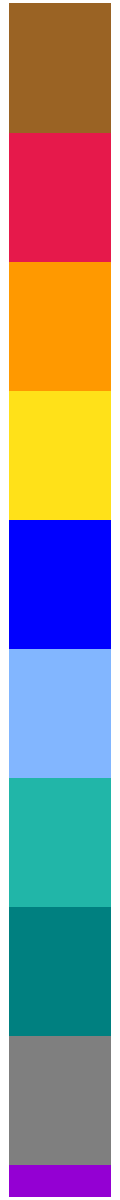

In [110]:
options(repr.plot.width=1, repr.plot.height=10)

ann_df$celltype <- factor(ann_df$celltype, levels = order[sort(match(unique(ann_df$celltype),order))])

color <- palette[sort(match(unique(ann_df$celltype),order))]

(cell_ann_p <- ann_df %>% ggplot(aes(x=col, y=row, fill=celltype)) + geom_tile() + scale_fill_manual(values = color) + theme_nothing())

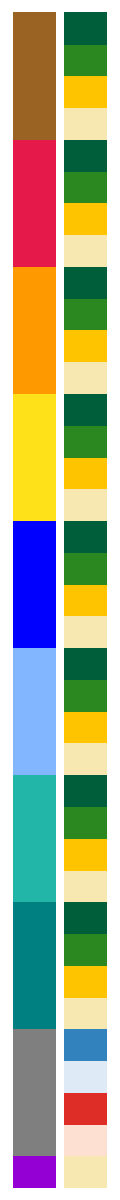

In [111]:
options(repr.plot.width=1, repr.plot.height=10)
cell_ann_p | time_ann_p

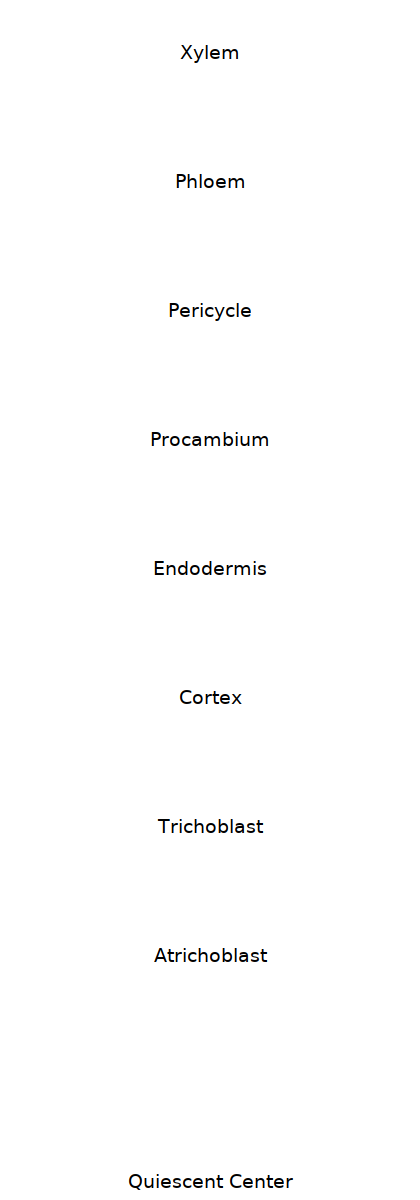

In [113]:
options(repr.plot.width=3.5, repr.plot.height=10)
(text_ann_p <- ann_df %>% ggplot(aes(x=col, y=row, label=Label)) + geom_text(size = 4) + theme(plot.margin = margin(0, 0, 35, 35, "cm")) + theme_nothing())

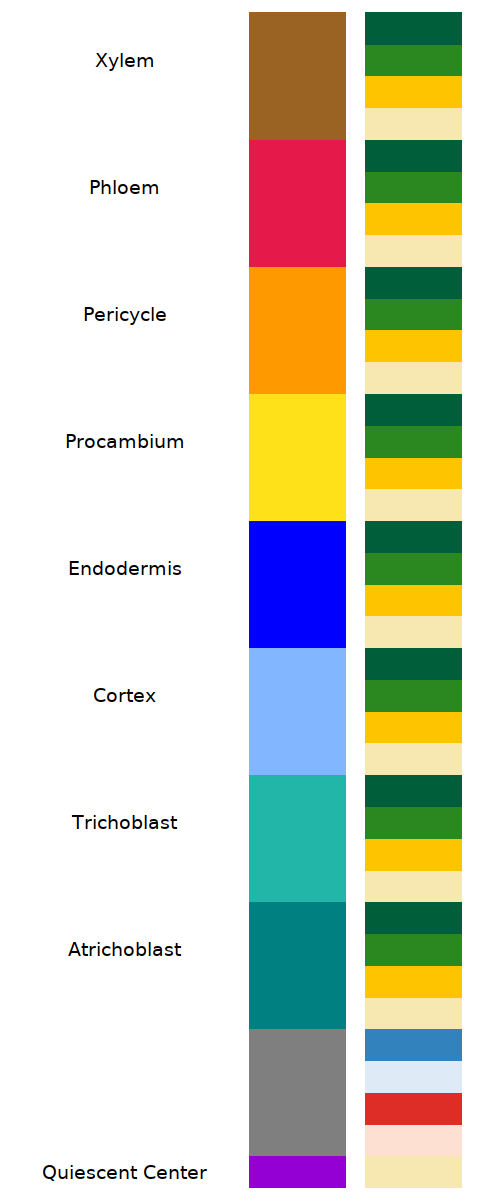

In [114]:
options(repr.plot.width=4, repr.plot.height=10)
(c_ann <- text_ann_p | (cell_ann_p | time_ann_p))

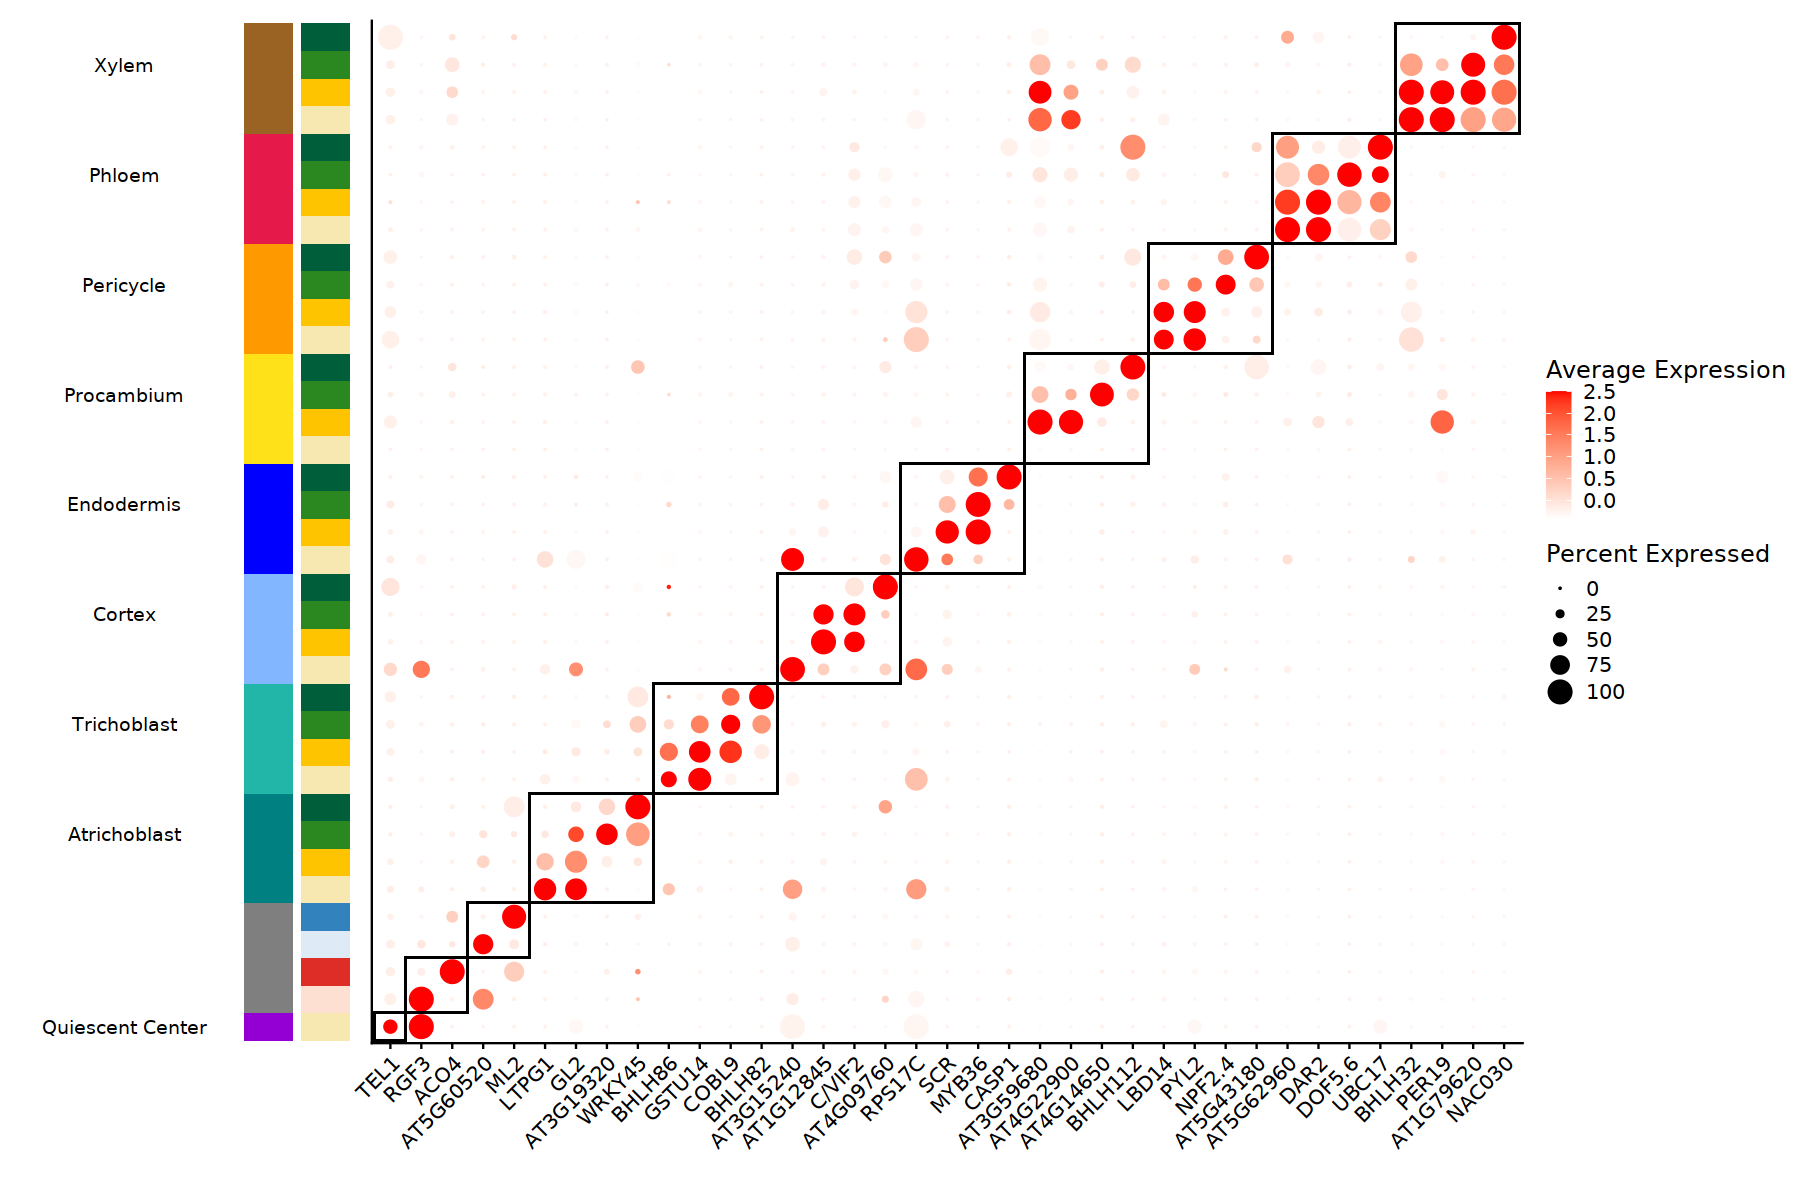

In [226]:
# BL 2 hours
options(repr.plot.width=15, repr.plot.height=10)
combined_marker_plot <- text_ann_p + cell_ann_p + time_ann_p + dot + patchwork
combined_marker_plot

In [145]:
ggsave("../BL_2hours_cell_dev_marker_dot_20220808.pdf", width=15, height=10)

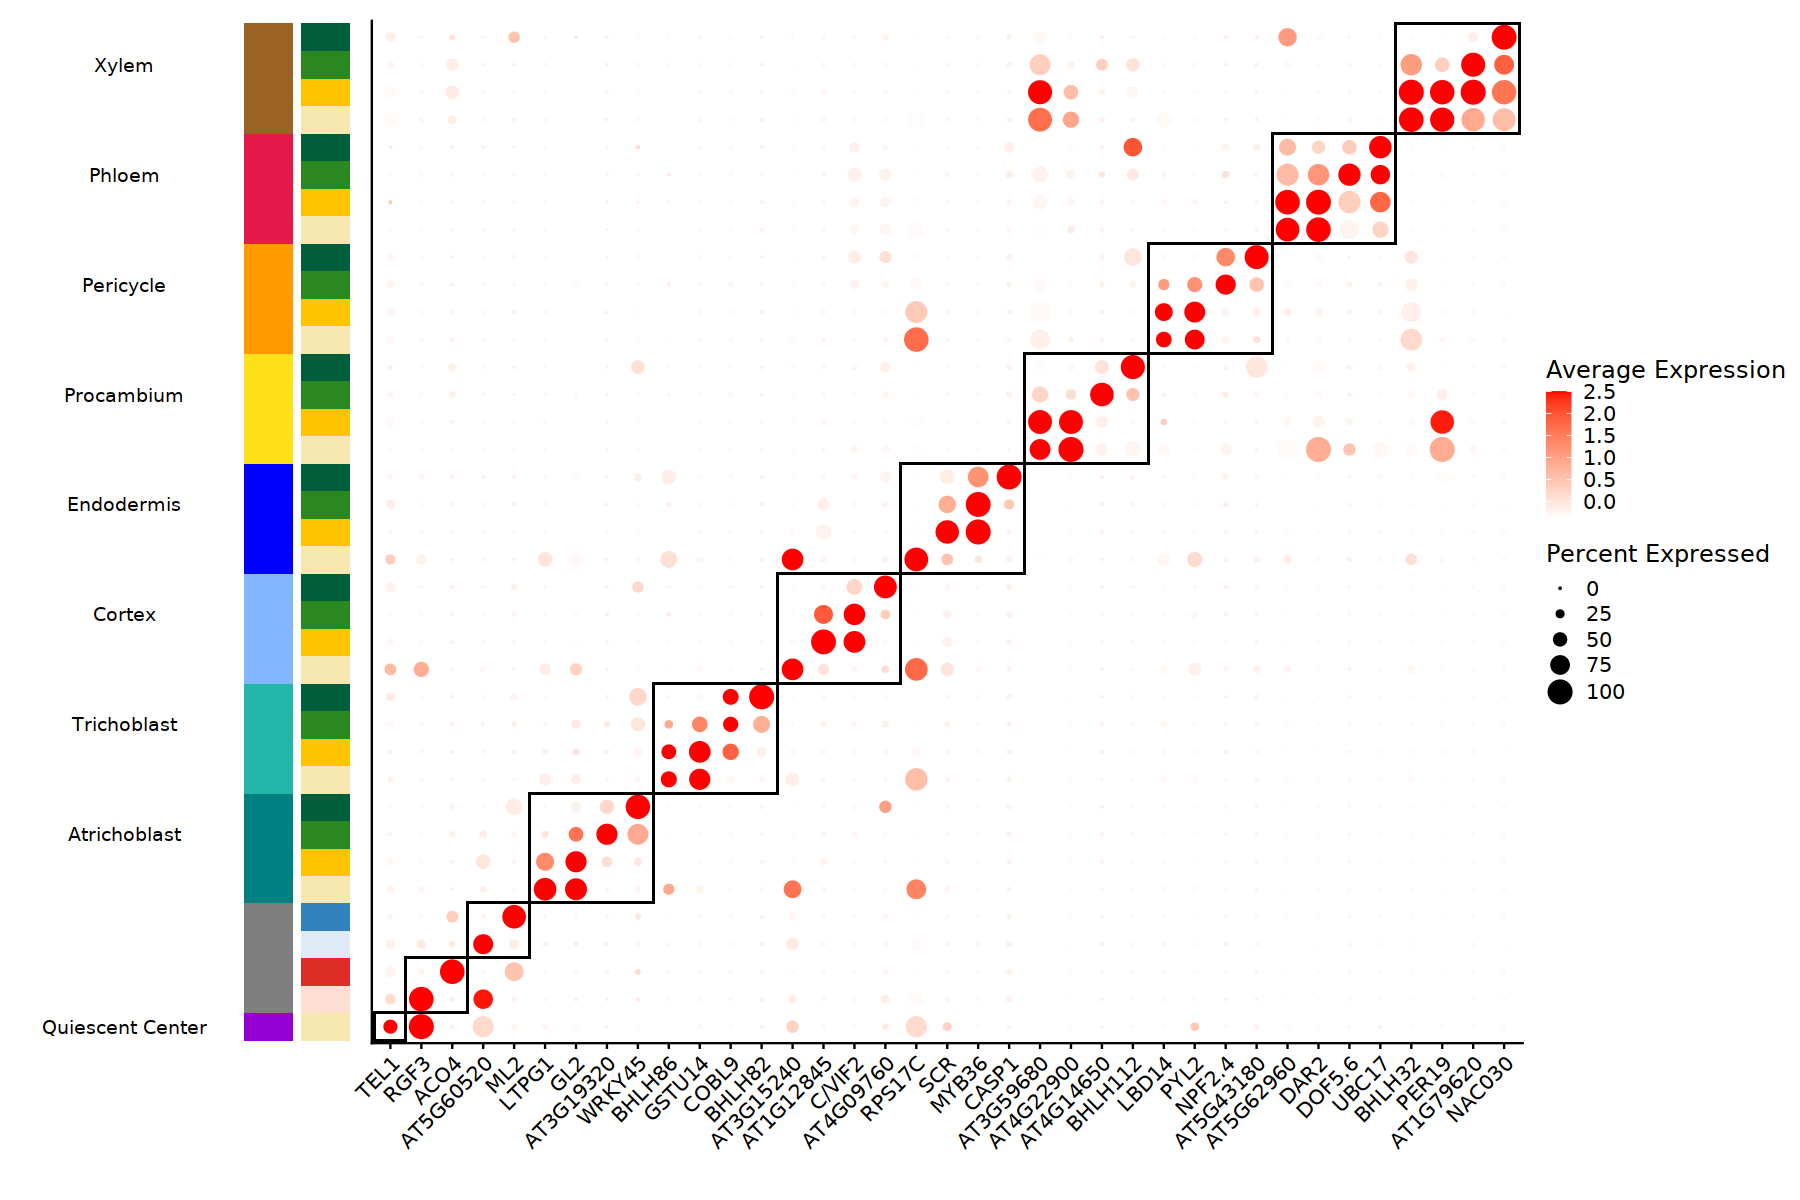

In [131]:
# BRZ
options(repr.plot.width=15, repr.plot.height=10)
combined_marker_plot <- text_ann_p + cell_ann_p + time_ann_p + dot + patchwork::plot_layout(widths = c(0.8,0.2,0.2,4), nrow=1)
combined_marker_plot

In [132]:
ggsave("../BRZ_cell_dev_marker_dot_20220808.pdf", width=15, height=10)

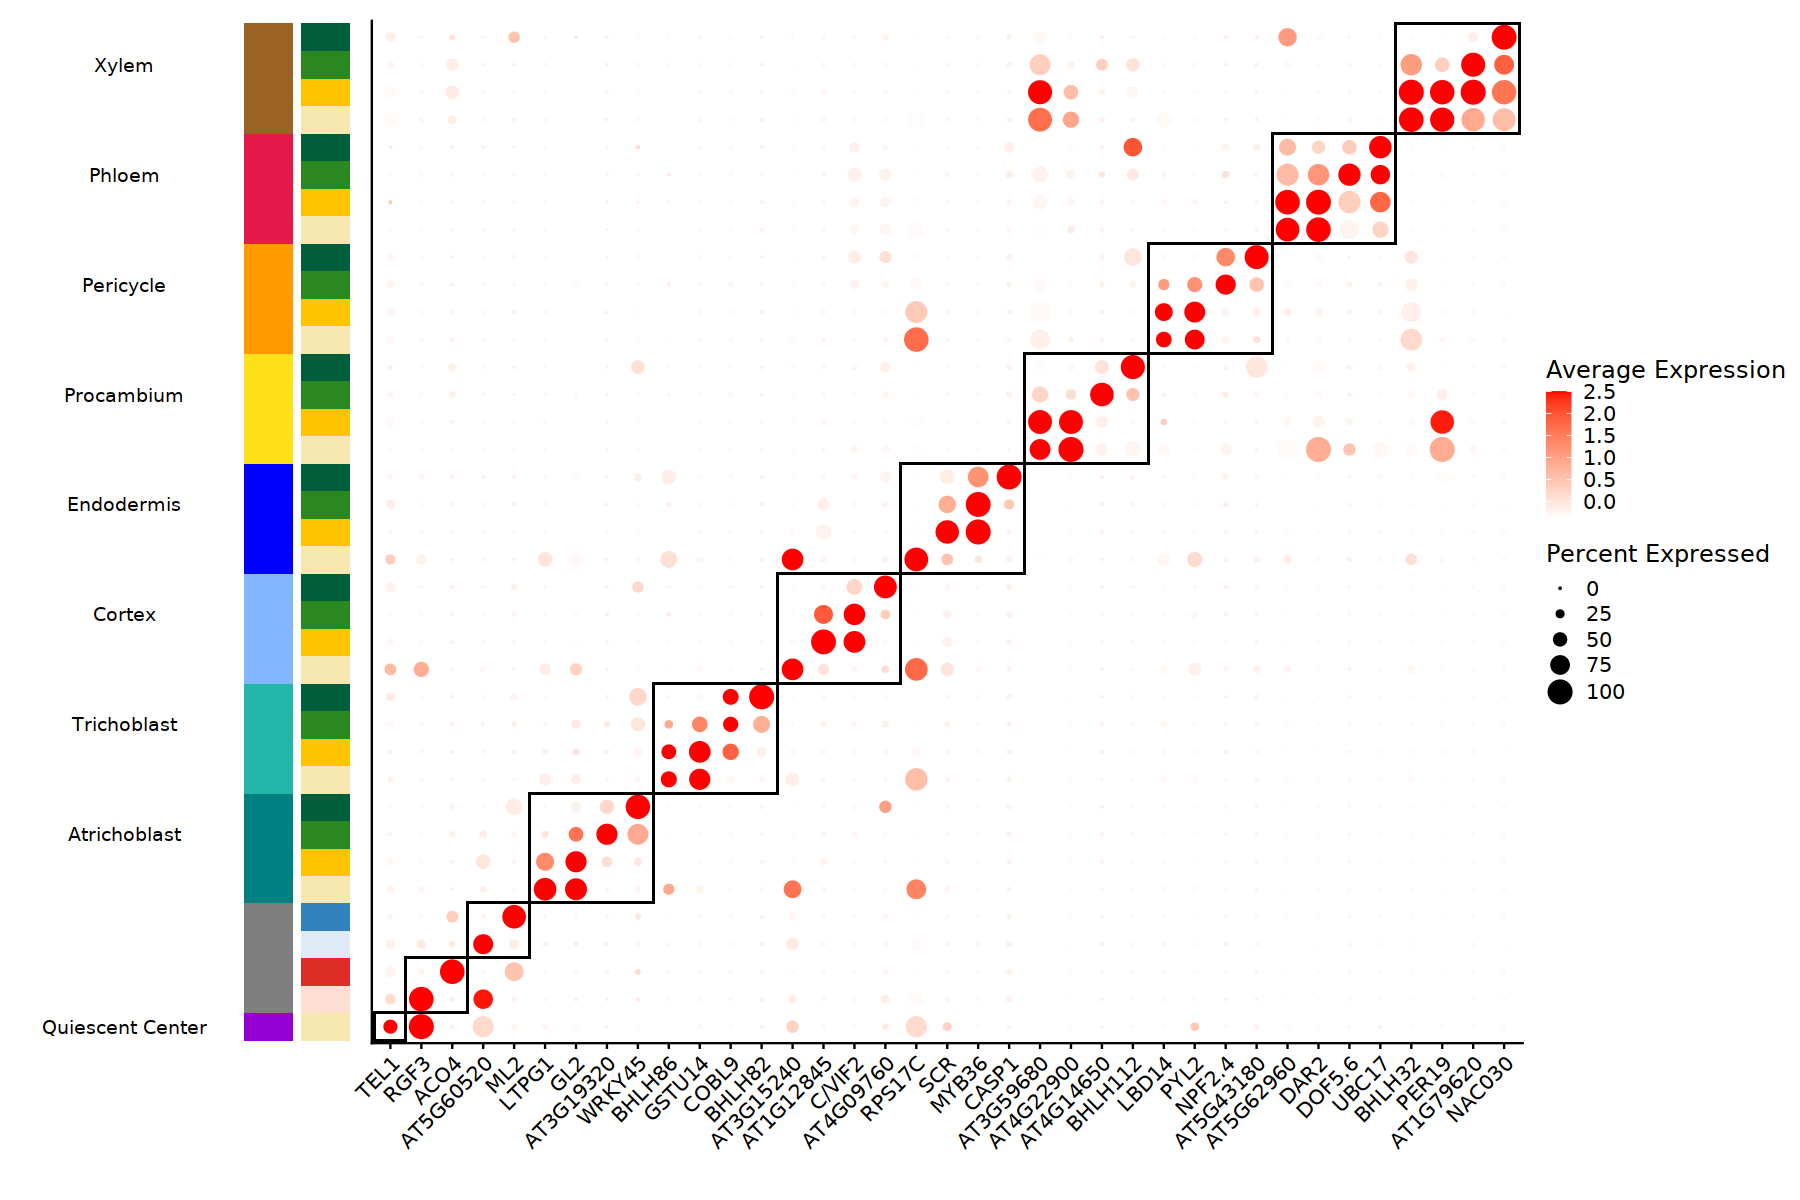

In [115]:
## BL time course
options(repr.plot.width=15, repr.plot.height=10)
combined_marker_plot <- text_ann_p + cell_ann_p + time_ann_p + dot + patchwork::plot_layout(widths = c(0.8,0.2,0.2,4), nrow=1)
combined_marker_plot

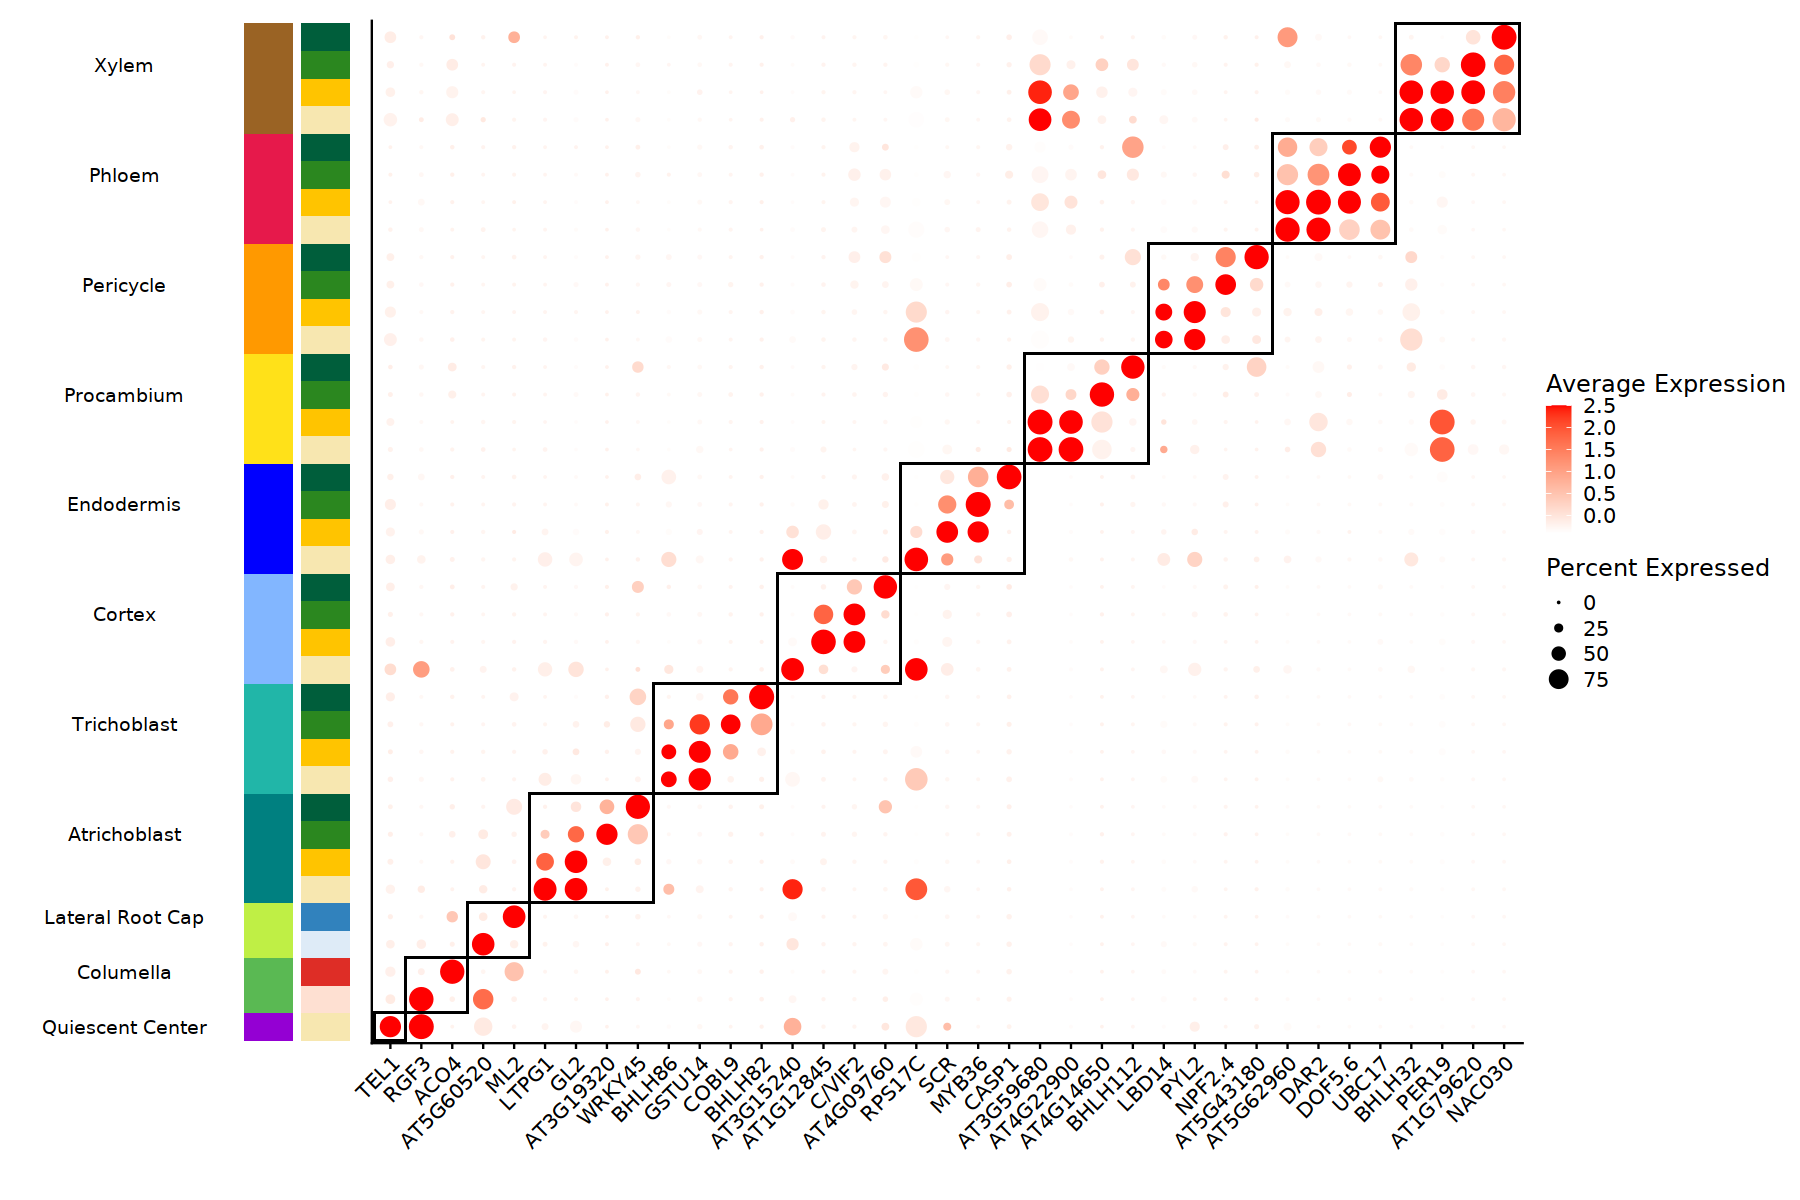

In [185]:
## WT atlas
options(repr.plot.width=15, repr.plot.height=10)
combined_marker_plot <- text_ann_p + cell_ann_p + time_ann_p + dot + patchwork::plot_layout(widths = c(0.8,0.2,0.2,4), nrow=1)
combined_marker_plot

In [186]:
ggsave("../Atlas_cell_dev_marker_dot_20220310.pdf", width=15, height=10)

In [77]:
sessionInfo()

R version 3.6.1 (2019-07-05)
Platform: x86_64-conda_cos6-linux-gnu (64-bit)
Running under: Ubuntu 16.04.6 LTS

Matrix products: default
BLAS/LAPACK: /home/tmnolan7/anaconda3/envs/r_3.6.1/lib/libopenblasp-r0.3.7.so

locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=en_US.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=en_US.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=en_US.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_US.UTF-8 LC_IDENTIFICATION=C       

attached base packages:
[1] grid      stats     graphics  grDevices utils     datasets  methods  
[8] base     

other attached packages:
 [1] ggrepel_0.8.2        gprofiler2_0.1.8     GeneOverlap_1.22.0  
 [4] circlize_0.4.8       ComplexHeatmap_2.2.0 cowplot_1.0.0       
 [7] future_1.17.0        RColorBrewer_1.1-2   Seurat_3.1.5        
[10] forcats_0.5.0        stringr_1.4.0        dplyr_0.8.5         
[13] purrr_0